# Face Segmentation

For this notebook, we will be finetuning a pre-trained DEEPLAB model in the Face segmentation task.

Face/head seg task is a fun task of segmenting different areas of the face/head like ears, hair, nose, eyes which has applications in Facial Expression Recognition, Facial Alignment, AR applications like Face Animoji, etc.

# Writing a Custom Dataset

In [ ]:
cd /content

/content


In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the file
downloaded = drive.CreateFile({'id':"1cZ_LWZLRFIAezeeRFLMKqXPpyZ7O-uvr"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Dataset_face_seg.zip')

In [ ]:
!mkdir Segdata 

In [ ]:
cd Segdata

/content/Segdata


In [ ]:
%%shell
unzip /content/Dataset_face_seg.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0423.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0426.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0429.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0432.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0435.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0438.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0441.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0444.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0447.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0450.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0453.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headrende0456.png  
  inflating: Dataset_face_seg/samples/maleelias_env02/headren

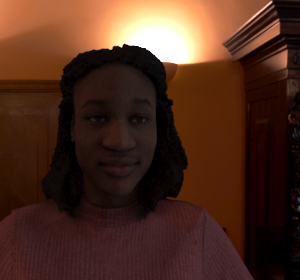

In [ ]:
from PIL import Image
Image.open('/content/Segdata/Dataset_face_seg/samples/female03_blackhair_browneyes_env08/headrende0002.png')

In [ ]:
with Image.open('/content/Segdata/Dataset_face_seg/labels/female03/headrende0000.png') as img:
  width, height = img.size
width, height

(300, 280)

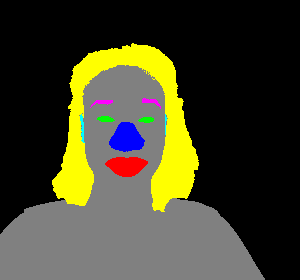

In [ ]:
Image.open ('/content/Segdata/Dataset_face_seg/labels/female03/headrende0000.png')

In [ ]:
#yallah let's begin exploring by importing some libraries
import os 
import cv2
from PIL import Image
import json
import shutil

In [ ]:
cd /content/Segdata/Dataset_face_seg/


/content/Segdata/Dataset_face_seg


In [ ]:
mkdir samplesArranged

In [ ]:
# path where the dataset is downloaded
inputPath = r"/content/Segdata/Dataset_face_seg/samples/"
labelsPath = r"/content/Segdata/Dataset_face_seg/labels"

# new folder where the cleanedup and organized dataset is placed
outputPath = r"/content/Segdata/Dataset_face_seg/samplesArranged"

# Step 1: Look at folder arrangement
labelsDist = sorted(os.listdir(labelsPath))
print(labelsDist)
# Returns list of folders
# ['female03', 'female10', 'female23', 'femalealison1', 'femalealison2', 'femalebarbera', 'femalebarbera2', 'femalecarla', 'femalecarla2', 'femalefelice', 'femalejoyce', 'femalejoyce2', 'femalelaura', 'femalelaura2', 'femaleroberta', 'male01', 'male06_1', 'male06_2', 'male09', 'male23', 'maleandrew', 'maleandrew2', 'malebruce', 'malebruce2', 'malecarlos', 'malecarlos2', 'malecorry', 'malecorry2', 'maleelias', 'maleelias2', 'malegaberial', 'malegaberial2', 'malekumar', 'maleshawn', 'multiperson', 'real']


['female03', 'female10', 'female23', 'femalealison1', 'femalealison2', 'femalebarbera', 'femalebarbera2', 'femalecarla', 'femalecarla2', 'femalefelice', 'femalejoyce', 'femalejoyce2', 'femalelaura', 'femalelaura2', 'femaleroberta', 'male01', 'male06_1', 'male06_2', 'male09', 'male23', 'maleandrew', 'maleandrew2', 'malebruce', 'malebruce2', 'malecarlos', 'malecarlos2', 'malecorry', 'malecorry2', 'maleelias', 'maleelias2', 'malegaberial', 'malegaberial2', 'malekumar', 'maleshawn', 'multiperson', 'real']


In [ ]:
for folder in labelsDist:
    os.mkdir(os.path.join(outputPath, folder))

In [ ]:
folderTypes = {"female": [], "male": [], "multiperson": [], "real": []}

for folder in os.listdir(inputPath):
    if folder.startswith("female"):
        folderTypes["female"].append(folder.split("_")[0])
        if os.path.isdir(os.path.join(outputPath, folderTypes["female"][-1])):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, folderTypes["female"][-1], file))
    
    elif folder.startswith("multiperson"):
        folderTypes["multiperson"].append(folder.split("_")[0])
        if os.path.isdir(os.path.join(outputPath, folderTypes["multiperson"][-1])):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, folderTypes["multiperson"][-1], file))
    
    elif folder.startswith("male"):
        
        folderTypes["male"].append(folder.split("_")[0])
        if folder.startswith("male06") and "nolight" in folder:
            outFolder = "male06_2"
        
        elif folder.startswith("male06"):
            outFolder = "male06_1"
        
        else:
            outFolder = folderTypes["male"][-1]
        if os.path.isdir(os.path.join(outputPath, outFolder)):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, outFolder, file))

    else:
        if folder.startswith("real") and os.path.isdir(os.path.join(outputPath, "real")):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, "real", file))

In [ ]:
for folder in labelsDist:
    if len(os.listdir(os.path.join(labelsPath, folder))) != len(os.listdir(os.path.join(outputPath, folder))):
        print(folder, len(os.listdir(os.path.join(labelsPath, folder))), len(os.listdir(os.path.join(outputPath, folder))))

female23 501 334
femalealison1 501 167
femalealison2 501 167
femalebarbera 501 334
femalecarla 501 334
femalefelice 501 251
femalejoyce 501 334
femalelaura 501 334
male06_1 351 284
male06_2 501 393
male09 351 117
male23 501 167
maleandrew 501 334
malebruce 501 334
malecarlos 501 334
malecarlos2 501 251
malecorry 501 334
maleelias 501 333
malegaberial 501 334
maleshawn 501 334
real 2505 2500


In [ ]:
import matplotlib.pyplot as plt

allSamples = []
_id = 0
for folder in os.listdir(outputPath):
    for file in os.listdir(os.path.join(outputPath, folder)):
        if file in os.listdir(os.path.join(labelsPath, folder)):
            image = Image.open(os.path.join(outputPath, folder, file))
            mask = Image.open(os.path.join(labelsPath, folder, file))
            
            try:
                assert image.size == mask.size
                allSamples.append({"id": _id, "folder": folder, "Filename": file, "size": image.size})
                _id += 1
            except AssertionError:
                print(folder, file, image.size, mask.size)
  

real osho_seq51672_scaled.png (239, 256) (256, 239)


In [ ]:
import pandas as pd
dataSamples = pd.DataFrame(allSamples, columns=allSamples[0].keys())
dataSamples.to_csv("FinalSamples.csv", index=False)

In [ ]:
dataSamples

id       folder           Filename        size
0          0    malecorry  headrende0225.png  (300, 280)
1          1    malecorry  headrende0253.png  (300, 280)
2          2    malecorry  headrende0336.png  (300, 280)
3          3    malecorry  headrende0219.png  (300, 280)
4          4    malecorry  headrende0345.png  (300, 280)
...      ...          ...                ...         ...
14593  14593  femalecarla  headrende0371.png  (300, 280)
14594  14594  femalecarla  headrende0447.png  (300, 280)
14595  14595  femalecarla  headrende0009.png  (300, 280)
14596  14596  femalecarla  headrende0464.png  (300, 280)
14597  14597  femalecarla  headrende0417.png  (300, 280)

[14598 rows x 4 columns]

In [ ]:
cd /content/Segdata/Dataset_face_seg

/content/Segdata/Dataset_face_seg


In [ ]:
mkdir dataset

In [ ]:
cd /content/Segdata/Dataset_face_seg/dataset

/content/Segdata/Dataset_face_seg/dataset


In [ ]:
mkdir images

In [ ]:
mkdir masks

In [ ]:
finalPath = r"/content/Segdata/Dataset_face_seg/dataset"

for row, sample in dataSamples.iterrows():
    imagePath = os.path.join(outputPath, sample["folder"], sample["Filename"])
    maskPath = os.path.join(labelsPath, sample["folder"], sample["Filename"])
    
    shutil.copy(imagePath, os.path.join(finalPath, "images", sample["folder"] + "_" + sample["Filename"]))
    shutil.copy(maskPath, os.path.join(finalPath, "masks", sample["folder"] + "_" + sample["Filename"]))

In [ ]:
cd /content/Segdata/Dataset_face_seg/dataset/images

/content/Segdata/Dataset_face_seg/dataset/images


In [ ]:
ls

Streaming output truncated to the last 5000 lines.
 malecorry2_headrende0419.png
 malecorry2_headrende0420.png
 malecorry2_headrende0421.png
 malecorry2_headrende0422.png
 malecorry2_headrende0423.png
 malecorry2_headrende0424.png
 malecorry2_headrende0425.png
 malecorry2_headrende0426.png
 malecorry2_headrende0427.png
 malecorry2_headrende0428.png
 malecorry2_headrende0429.png
 malecorry2_headrende0430.png
 malecorry2_headrende0431.png
 malecorry2_headrende0432.png
 malecorry2_headrende0433.png
 malecorry2_headrende0434.png
 malecorry2_headrende0435.png
 malecorry2_headrende0436.png
 malecorry2_headrende0437.png
 malecorry2_headrende0438.png
 malecorry2_headrende0439.png
 malecorry2_headrende0440.png
 malecorry2_headrende0441.png
 malecorry2_headrende0442.png
 malecorry2_headrende0443.png
 malecorry2_headrende0444.png
 malecorry2_headrende0445.png
 malecorry2_headrende0446.png
 malecorry2_headrende0447.png
 malecorry2_headrende0448.png
 malecorry2_headrende0449.png
 malecorry2_headren

In [ ]:
cd /content/Segdata/Dataset_face_seg/dataset/masks

/content/Segdata/Dataset_face_seg/dataset/masks


In [ ]:
ls

Streaming output truncated to the last 5000 lines.
 malecorry2_headrende0419.png
 malecorry2_headrende0420.png
 malecorry2_headrende0421.png
 malecorry2_headrende0422.png
 malecorry2_headrende0423.png
 malecorry2_headrende0424.png
 malecorry2_headrende0425.png
 malecorry2_headrende0426.png
 malecorry2_headrende0427.png
 malecorry2_headrende0428.png
 malecorry2_headrende0429.png
 malecorry2_headrende0430.png
 malecorry2_headrende0431.png
 malecorry2_headrende0432.png
 malecorry2_headrende0433.png
 malecorry2_headrende0434.png
 malecorry2_headrende0435.png
 malecorry2_headrende0436.png
 malecorry2_headrende0437.png
 malecorry2_headrende0438.png
 malecorry2_headrende0439.png
 malecorry2_headrende0440.png
 malecorry2_headrende0441.png
 malecorry2_headrende0442.png
 malecorry2_headrende0443.png
 malecorry2_headrende0444.png
 malecorry2_headrende0445.png
 malecorry2_headrende0446.png
 malecorry2_headrende0447.png
 malecorry2_headrende0448.png
 malecorry2_headrende0449.png
 malecorry2_headren

# Still the Preprocessing to be done : Mainly handling near duplicate images!

Why do we need to care about near-duplicates?
1. Introduces bias to your dataset
Reduces the ability of your model to generalize to images outside your training distribution
2. How can we remove them?

We need to first detect near-duplicates:
1. we first need to hash images to have a numerical representation of each image
Remove near-duplicates.
2. Once we compute the hashes, we can consider images with the same hash value as duplicates and remove them

In [ ]:
from imutils import paths
import numpy as np
import argparse
import cv2
import os

In [ ]:

def dhash(image, hashSize=8):
    # convert the image to grayscale and resize the grayscale image,
    # adding a single column (width) so we can compute the horizontal
    # gradient
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (hashSize + 1, hashSize))
    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]
    # convert the difference image to a hash and return it
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [ ]:
print("[INFO] computing image hashes...")
imagePaths = list(paths.list_images("../../dataset/images"))
hashes = {}
# loop over our image paths
for imagePath in imagePaths:
    # load the input image and compute the hash
    image = cv2.imread(imagePath)
    h = dhash(image)
    # grab all image paths with that hash, add the current image
    # path to it, and store the list back in the hashes dictionary
    p = hashes.get(h, [])
    p.append(imagePath)
    hashes[h] = p

[INFO] computing image hashes...


In [ ]:

remove = True

# loop over the image hashes
for (h, hashedPaths) in hashes.items():
    # check to see if there is more than one image with the same hash
    if len(hashedPaths) > 1:
        # check to see if this is a dry run
        if not remove:
            # initialize a montage to store all images with the same
            # hash
            montage = None
            # loop over all image paths with the same hash
            for p in hashedPaths:
                # load the input image and resize it to a fixed width
                # and heightG
                image = cv2.imread(p)
                image = cv2.resize(image, (150, 150))
                # if our montage is None, initialize it
                if montage is None:
                    montage = image
                # otherwise, horizontally stack the images
                else:
                    montage = np.hstack([montage, image])
            # show the montage for the hash
            print("[INFO] hash: {}".format(h))
            cv2.imshow("Montage", montage)
            cv2.waitKey(0)
        # otherwise, we'll be removing the duplicate images
        else:
            # loop over all image paths with the same hash *except*
            # for the first image in the list (since we want to keep
            # one, and only one, of the duplicate images)
            for p in hashedPaths[1:]:
                os.remove(p)
                os.remove(p.replace("/images/", "/masks/"))

In [ ]:
cd /content/Segdata/Dataset_face_seg/dataset

/content/Segdata/Dataset_face_seg/dataset


In [ ]:
mkdir subsamples 

In [ ]:

allFilesPath = r"/content/Segdata/Dataset_face_seg/dataset/"

subSamplesPath = r"/content/Segdata/Dataset_face_seg/dataset/subsamples"

In [ ]:
#Create sub sample of datset for training
oldFolders = {}

for imageFile, maskFile in zip(os.listdir(os.path.join(allFilesPath, "images")), os.listdir(os.path.join(allFilesPath, "masks"))):
    if imageFile == maskFile:
        try:
            if oldFolders.get(imageFile.split("_")[0]):
                oldFolders[imageFile.split("_")[0]] += 1
            else:
                oldFolders[imageFile.split("_")[0]] = 1
        except:
            oldFolders[imageFile.split("_")[0]] = 1
            
    else:
        print(imageFile)

In [ ]:
oldFolders

{'female03': 501,
 'female10': 501,
 'female23': 334,
 'femalealison1': 167,
 'femalealison2': 167,
 'femalebarbera': 334,
 'femalebarbera2': 501,
 'femalecarla': 334,
 'femalecarla2': 501,
 'femalefelice': 251,
 'femalejoyce': 334,
 'femalejoyce2': 501,
 'femalelaura': 334,
 'femalelaura2': 501,
 'femaleroberta': 501,
 'male01': 501,
 'male06': 608,
 'male09': 108,
 'male23': 167,
 'maleandrew': 334,
 'maleandrew2': 251,
 'malebruce': 334,
 'malebruce2': 501,
 'malecarlos': 334,
 'malecarlos2': 251,
 'malecorry': 334,
 'malecorry2': 501,
 'maleelias': 333,
 'maleelias2': 501,
 'malegaberial': 334,
 'malegaberial2': 250,
 'malekumar': 501,
 'maleshawn': 334,
 'multiperson': 501,
 'real': 1723}

In [ ]:
cd /content/Segdata/Dataset_face_seg/dataset/subsamples

/content/Segdata/Dataset_face_seg/dataset/subsamples


In [ ]:
mkdir images

In [ ]:
mkdir masks

In [ ]:
import random

addedFiles = {k: 0 for k in oldFolders.keys()}

allImages = os.listdir(os.path.join(allFilesPath, "images"))
random.shuffle(allImages)

for image in allImages:
    if image.split("_")[0] == "real" or (image.split("_")[0] == "multiperson" and addedFiles[image.split("_")[0]]<50) or addedFiles[image.split("_")[0]]<10:
        addedFiles[image.split("_")[0]] += 1
        shutil.copy(os.path.join(allFilesPath, "images", image), os.path.join(subSamplesPath, "images", image))
        shutil.copy(os.path.join(allFilesPath, "masks", image), os.path.join(subSamplesPath, "masks", image))

In [ ]:
addedFiles

{'female03': 10,
 'female10': 10,
 'female23': 10,
 'femalealison1': 10,
 'femalealison2': 10,
 'femalebarbera': 10,
 'femalebarbera2': 10,
 'femalecarla': 10,
 'femalecarla2': 10,
 'femalefelice': 10,
 'femalejoyce': 10,
 'femalejoyce2': 10,
 'femalelaura': 10,
 'femalelaura2': 10,
 'femaleroberta': 10,
 'male01': 10,
 'male06': 10,
 'male09': 10,
 'male23': 10,
 'maleandrew': 10,
 'maleandrew2': 10,
 'malebruce': 10,
 'malebruce2': 10,
 'malecarlos': 10,
 'malecarlos2': 10,
 'malecorry': 10,
 'malecorry2': 10,
 'maleelias': 10,
 'maleelias2': 10,
 'malegaberial': 10,
 'malegaberial2': 10,
 'malekumar': 10,
 'maleshawn': 10,
 'multiperson': 50,
 'real': 1723}

After cleaning up the dataset we have around 14k samples. Let’s create subsamples for faster experimentation.
For this subsampling, we follow the below strategies,

1. Use all samples from “real images”, since almost all images are unique and real-world/natural images
2. Randomly samples 50 images from “multi-person images” since it has the same images from different viewing angles and lighting conditions
3. Randomly sample 10 images from other categories (i.e) images of the same person like female: Alison, male: Gabriel

In [ ]:
newFolders = {}

for imageFile, maskFile in zip(os.listdir(os.path.join(subSamplesPath, "images")), os.listdir(os.path.join(subSamplesPath, "masks"))):
    if imageFile == maskFile:
        try:
            if newFolders.get(imageFile.split("_")[0]):
                newFolders[imageFile.split("_")[0]] += 1
            else:
                newFolders[imageFile.split("_")[0]] = 1
        except:
            newFolders[imageFile.split("_")[0]] = 1
            
    else:
        print(imageFile)

        
print("NEW DISTRIBUTION OF SAMPLES: ", len(os.listdir(os.path.join(subSamplesPath, "images"))))
print(newFolders)

NEW DISTRIBUTION OF SAMPLES:  2103
{'real': 1723, 'malecorry2': 10, 'femalecarla2': 10, 'male06': 10, 'female03': 10, 'maleelias': 10, 'multiperson': 50, 'malebruce2': 10, 'femalelaura2': 10, 'malebruce': 10, 'femalecarla': 10, 'femalejoyce': 10, 'female10': 10, 'male23': 10, 'maleandrew2': 10, 'femalealison2': 10, 'femalefelice': 10, 'maleelias2': 10, 'femalelaura': 10, 'maleshawn': 10, 'female23': 10, 'malekumar': 10, 'maleandrew': 10, 'femalealison1': 10, 'femalejoyce2': 10, 'femaleroberta': 10, 'malegaberial': 10, 'malegaberial2': 10, 'malecarlos2': 10, 'male09': 10, 'femalebarbera': 10, 'femalebarbera2': 10, 'malecarlos': 10, 'male01': 10, 'malecorry': 10}


After this subsampling, we now have 2103 samples which can be used to model training.

#Data Loader
We use Torch Dataloader for loading the dataset and then apply some transformations that we are going to define by ourselves since our dataset returns a dictionary which will not work with the standard transforms provided by Torchvision 

In [ ]:
from pathlib import Path
from typing import Any, Callable, Optional

import numpy as np
from PIL import Image
from torchvision.datasets.vision import VisionDataset


class SegmentationDataset(VisionDataset):
    """A PyTorch dataset for image segmentation task.
    The dataset is compatible with torchvision transforms.
    The transforms passed would be applied to both the Images and Masks.
    """
    def __init__(self,
                 root: str,
                 image_folder: str,
                 mask_folder: str,
                 transforms: Optional[Callable] = None,
                 seed: int = None,
                 fraction: float = None,
                 subset: str = None,
                 image_color_mode: str = "rgb",
                 mask_color_mode: str = "rgb") -> None:
        """
        Args:
            root (str): Root directory path.
            image_folder (str): Name of the folder that contains the images in the root directory.
            mask_folder (str): Name of the folder that contains the masks in the root directory.
            transforms (Optional[Callable], optional): A function/transform that takes in
            a sample and returns a transformed version.
            E.g, ``transforms.ToTensor`` for images. Defaults to None.
            seed (int, optional): Specify a seed for the train and test split for reproducible results. Defaults to None.
            fraction (float, optional): A float value from 0 to 1 which specifies the validation split fraction. Defaults to None.
            subset (str, optional): 'Train' or 'Test' to select the appropriate set. Defaults to None.
            image_color_mode (str, optional): 'rgb' or 'grayscale'. Defaults to 'rgb'.
            mask_color_mode (str, optional): 'rgb' or 'grayscale'. Defaults to 'grayscale'.
        Raises:
            OSError: If image folder doesn't exist in root.
            OSError: If mask folder doesn't exist in root.
            ValueError: If subset is not either 'Train' or 'Test'
            ValueError: If image_color_mode and mask_color_mode are either 'rgb' or 'grayscale'
        """
        super().__init__(root, transforms)
        image_folder_path = Path(self.root) / image_folder
        mask_folder_path = Path(self.root) / mask_folder
        if not image_folder_path.exists():
            raise OSError(f"{image_folder_path} does not exist.")
        if not mask_folder_path.exists():
            raise OSError(f"{mask_folder_path} does not exist.")

        if image_color_mode not in ["rgb", "grayscale"]:
            raise ValueError(
                f"{image_color_mode} is an invalid choice. Please enter from rgb grayscale."
            )
        if mask_color_mode not in ["rgb", "grayscale"]:
            raise ValueError(
                f"{mask_color_mode} is an invalid choice. Please enter from rgb grayscale."
            )

        self.image_color_mode = image_color_mode
        self.mask_color_mode = mask_color_mode

        if not fraction:
            self.image_names = sorted(image_folder_path.glob("*"))
            self.mask_names = sorted(mask_folder_path.glob("*"))
        else:
            if subset not in ["Train", "Test"]:
                raise (ValueError(
                    f"{subset} is not a valid input. Acceptable values are Train and Test."
                ))
            self.fraction = fraction
            self.image_list = np.array(sorted(image_folder_path.glob("*")))
            self.mask_list = np.array(sorted(mask_folder_path.glob("*")))
            if seed:
                np.random.seed(seed)
                indices = np.arange(len(self.image_list))
                np.random.shuffle(indices)
                self.image_list = self.image_list[indices]
                self.mask_list = self.mask_list[indices]
            if subset == "Train":
                self.image_names = self.image_list[:int(
                    np.ceil(len(self.image_list) * (1 - self.fraction)))]
                self.mask_names = self.mask_list[:int(
                    np.ceil(len(self.mask_list) * (1 - self.fraction)))]
            else:
                self.image_names = self.image_list[
                    int(np.ceil(len(self.image_list) * (1 - self.fraction))):]
                self.mask_names = self.mask_list[
                    int(np.ceil(len(self.mask_list) * (1 - self.fraction))):]

    def __len__(self) -> int:
        return len(self.image_names)

    def __getitem__(self, index: int) -> Any:
        image_path = self.image_names[index]
        mask_path = self.mask_names[index]
        with open(image_path, "rb") as image_file, open(mask_path,
                                                        "rb") as mask_file:
            image = Image.open(image_file)
            if self.image_color_mode == "rgb":
                image = image.convert("RGB")
            elif self.image_color_mode == "grayscale":
                image = image.convert("L")
            mask = Image.open(mask_file)
            if self.mask_color_mode == "rgb":
                mask = mask.convert("RGB")
            elif self.mask_color_mode == "grayscale":
                mask = mask.convert("L")
            sample = {"image": image, "mask": mask}
            if self.transforms:
                sample["image"] = self.transforms(sample["image"])
                sample["mask"] = self.transforms(sample["mask"])
            return sample

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms
seg_dataset = SegmentationDataset("/content/Segdata/Dataset_face_seg/dataset/subsamples", "images", "masks", transforms=transforms.Compose([transforms.Resize((300, 280)),transforms.ToTensor()]))
seg_dataloader = DataLoader(seg_dataset, batch_size=4, shuffle=False, num_workers=4)
#seg_dataloader = DataLoader(seg_dataset, batch_size=4, shuffle=False, num_workers=8)
samples = next(iter(seg_dataloader))
# Display the image and mask tensor shape
# We see the tensor size is correct bxcxhxw, where b is batch size, c is number of channels, h is height, w is width
display(samples['image'].shape,
samples['mask'].shape)


torch.Size([4, 3, 300, 280])

torch.Size([4, 3, 300, 280])

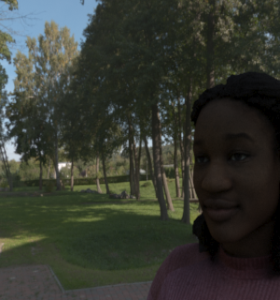

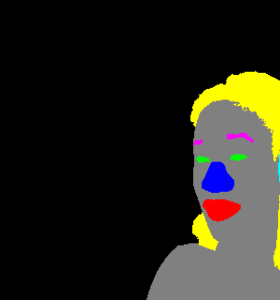

In [ ]:

img = transforms.ToPILImage()(samples['image'][0])
mask = transforms.ToPILImage()(samples['mask'][0])

display(img, mask)

# Define Our Baby Model

In [ ]:
""" DeepLabv3 Model download and change the head for your prediction"""
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
from torchvision import models



def createDeepLabv3(outputchannels=1):
    model = models.segmentation.deeplabv3_resnet101(
        pretrained=True, progress=True,)
    # Added a Tanh activation after the last convolution layer
    model.classifier = DeepLabHead(2048, outputchannels)
    # Set the model in training mode
    model.train()
    return model

# Prepare the Garden To play!

In [ ]:
import csv
import copy
import time
from tqdm import tqdm
import torch
import numpy as np
import os


def train_model(model, criterion, dataloaders, optimizer, metrics, bpath, num_epochs=3):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10
    # Use gpu if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    # Initialize the log file for training and testing loss and metrics
    fieldnames = ['epoch', 'Train_loss', 'Test_loss'] + \
        [f'Train_{m}' for m in metrics.keys()] + \
        [f'Test_{m}' for m in metrics.keys()]
    with open(os.path.join(bpath, 'log.csv'), 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

    for epoch in range(1, num_epochs+1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)
        # Each epoch has a training and validation phase
        # Initialize batch summary
        batchsummary = {a: [0] for a in fieldnames}

        for phase in ['Train', 'Test']:
            if phase == 'Train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            # Iterate over data.
            #print(dataloaders[phase].shape())
            for sample in tqdm(iter(dataloaders[phase])):
                inputs = sample['image'].to(device)
                masks = sample['mask'].to(device)
                print("inputs__zina",inputs.shape)
                print("masks__zina",masks.shape)
                # zero the parameter gradients
                optimizer.zero_grad()

                # track history if only in train
                with torch.set_grad_enabled(phase == 'Train'):
                    outputs = model(inputs)
                    loss = criterion(outputs['out'], masks)
                    y_pred = outputs['out'].data.cpu().numpy().ravel()
                    y_true = masks.data.cpu().numpy().ravel()
                    for name, metric in metrics.items():
                        if name == 'f1_score':
                            # Use a classification threshold of 0.1
                            batchsummary[f'{phase}_{name}'].append(
                                metric(y_true > 0, y_pred > 0.1))
                        else:
                            batchsummary[f'{phase}_{name}'].append(
                                metric(y_true.astype('uint8'), y_pred))

                    # backward + optimize only if in training phase
                    if phase == 'Train':
                        loss.backward()
                        optimizer.step()
            batchsummary['epoch'] = epoch
            epoch_loss = loss
            batchsummary[f'{phase}_loss'] = epoch_loss.item()
            print('{} Loss: {:.4f}'.format(
                phase, loss))
        for field in fieldnames[3:]:
            batchsummary[field] = np.mean(batchsummary[field])
        print(batchsummary)
        with open(os.path.join(bpath, 'log.csv'), 'a', newline='') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writerow(batchsummary)
            # deep copy the model
            if phase == 'Test' and loss < best_loss:
                best_loss = loss
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Lowest Loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def get_dataloader_single_folder(data_dir: str,
                                 image_folder: str = 'images',
                                 mask_folder: str = 'masks',
                                 fraction: float = 0.2,
                                 batch_size: int = 4):
    """Create train and test dataloader from a single directory containing
    the image and mask folders.
    Args:
        data_dir (str): Data directory path or root
        image_folder (str, optional): Image folder name. Defaults to 'Images'.
        mask_folder (str, optional): Mask folder name. Defaults to 'Masks'.
        fraction (float, optional): Fraction of Test set. Defaults to 0.2.
        batch_size (int, optional): Dataloader batch size. Defaults to 4.
    Returns:
        dataloaders: Returns dataloaders dictionary containing the
        Train and Test dataloaders.
    """
    data_transforms = transforms.Compose([transforms.Resize((300, 280)),transforms.ToTensor()])
    #data_transforms = transforms.Compose([transforms.Resize((559, 536)),transforms.ToTensor()])
    image_datasets = {
        x: SegmentationDataset(data_dir,
                               image_folder=image_folder,
                               mask_folder=mask_folder,
                               seed=100,
                               fraction=fraction,
                               subset=x,
                               transforms=data_transforms)
        for x in ['Train', 'Test']
    }
    dataloaders = {
        x: DataLoader(image_datasets[x],
                      batch_size=batch_size,
                      shuffle=True,
                      num_workers=8)
        for x in ['Train', 'Test']
    }
    return dataloaders

# Put Everything Together Guys!

In [ ]:
cd /content/Segdata/Dataset_face_seg

/content/Segdata/Dataset_face_seg


In [ ]:
mkdir CFEXP1

In [ ]:
import torch.optim as optim
from sklearn.metrics import roc_auc_score, f1_score
import torch

#experience directory

bpath = '/content/Segdata/Dataset_face_seg/CFEXP1'
#data directory
data_dir = '/content/Segdata/Dataset_face_seg/dataset/subsamples'
#epochs
epochs = 100
#epochs =20
#epochs =10
#batchsize
batchsize = 16


# Create the deeplabv3 resnet101 model which is pretrained on a subset of COCO train2017, on the 20 categories that are present in the Pascal VOC dataset.
model = createDeepLabv3(3)
model.train()
# Create the experiment directory if not present
if not os.path.isdir(bpath):
    os.mkdir(bpath)


# Specify the loss function
criterion = torch.nn.MSELoss(reduction='mean')
##class entropy loss?

# Specify the optimizer with a lower learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Specify the evalutation metrics
#metrics = {'f1_score': f1_score, 'auroc': roc_auc_score}
metrics = {'f1_score': f1_score}

#Images/Masks!
# Create the dataloader
#dataloaders = get_dataloader_single_folder(data_dir, imageFolder='Images', maskFolder='Masks', fraction=0.2, batch_size=batchsize)
  # Create the dataloader
dataloaders =get_dataloader_single_folder(
        data_dir, batch_size=batchsize)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


In [ ]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

In [ ]:
trained_model = train_model(model, criterion, dataloaders,
                            optimizer, bpath=bpath, metrics=metrics, num_epochs=epochs)

Epoch 1/100
----------


  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<09:57,  5.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:09<09:03,  5.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:13<08:24,  4.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<07:56,  4.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:22<07:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:26<07:22,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:30<07:12,  4.37s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:34<07:03,  4.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:39<06:56,  4.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:43<06:50,  4.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:47<06:45,  4.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:51<06:41,  4.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:56<06:38,  4.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:00<06:35,  4.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:04<06:32,  4.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:09<06:30,  4.34s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:13<06:28,  4.36s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:18<06:25,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:22<06:22,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:27<06:19,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:31<06:15,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:35<06:13,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:40<06:10,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:45<06:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:49<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:54<06:02,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [01:58<05:59,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:03<05:55,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:07<05:51,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:12<05:46,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:16<05:41,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:21<05:36,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:25<05:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:30<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:34<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:39<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:43<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:48<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:52<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:57<04:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:01<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:06<04:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:10<04:44,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:15<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:20<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:24<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:29<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:33<04:22,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:38<04:17,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:42<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:47<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:51<04:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:56<03:59,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:00<03:55,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:05<03:50,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:09<03:46,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:14<03:41,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:18<03:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:23<03:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:27<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:32<03:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:36<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:41<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:45<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:50<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:54<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:59<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:03<02:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:08<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:12<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:17<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:21<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:26<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:30<02:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:35<02:19,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:39<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:44<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:48<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:53<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:57<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:02<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:06<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:11<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:15<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:20<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:24<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:29<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:33<01:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:38<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:42<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:47<01:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:51<01:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:56<00:58,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:00<00:54,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:05<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:09<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:14<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:19<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:23<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:27<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:32<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:36<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:41<00:13,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:45<00:08,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:50<00:04,  4.48s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:51<00:00,  4.45s/it]

Train Loss: 0.0679



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.94s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0389
{'epoch': 1, 'Train_loss': 0.06794358789920807, 'Test_loss': 0.038922473788261414, 'Train_f1_score': 0.6554198917625652, 'Test_f1_score': 0.7419314085641621}
Epoch 2/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:14,  5.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:28,  5.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:53,  5.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:28,  4.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:10,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.75s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:34,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:30,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:25,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:46,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:41,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0342



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:25,  3.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:02,  2.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:32,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0498
{'epoch': 2, 'Train_loss': 0.034162458032369614, 'Test_loss': 0.049807626754045486, 'Train_f1_score': 0.764306851973264, 'Test_f1_score': 0.751841864157158}
Epoch 3/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:11,  5.82s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:25,  5.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:51,  5.16s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:27,  4.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:09,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:54,  4.74s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:43,  4.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:24,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:42,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:21,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0259



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:02,  2.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:49,  2.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.17s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0196
{'epoch': 3, 'Train_loss': 0.025890953838825226, 'Test_loss': 0.019594164565205574, 'Train_f1_score': 0.8192544608073947, 'Test_f1_score': 0.7701294152644726}
Epoch 4/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:09,  5.80s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:23,  5.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:51,  5.16s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:27,  4.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:09,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:21,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:02<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:11<05:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:47<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:00,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:55,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:05<04:51,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:42,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:33,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:24,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:08<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:17<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:35<03:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:44<03:12,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:53<03:03,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:02<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:11<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:20<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:29<02:29,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:20,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:56<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:05<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:14<01:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:23<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:32<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:41<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:50<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:59<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:08<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:17<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:26<00:31,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:35<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:44<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:53<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0438



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0156
{'epoch': 4, 'Train_loss': 0.043820783495903015, 'Test_loss': 0.015563095919787884, 'Train_f1_score': 0.8555571030788328, 'Test_f1_score': 0.772760375414122}
Epoch 5/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:12,  5.84s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:26,  5.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:53,  5.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:28,  4.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:09,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.75s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:45,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:48,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:00,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:55,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:05<04:50,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:46,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:41,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:37,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:32,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:28,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:24,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:19,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:15,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:08<03:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:17<03:39,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:30,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:35<03:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:44<03:12,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:53<03:03,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:02<02:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:11<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:20<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:29<02:28,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:38<02:19,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:47<02:09,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:56<02:00,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:00<01:56,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:05<01:51,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:09<01:47,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:14<01:42,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:18<01:38,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:23<01:34,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:27<01:29,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:32<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:36<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:41<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:45<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:50<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:54<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:59<00:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:03<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:08<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:12<00:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:17<00:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:21<00:35,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:26<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:30<00:26,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:35<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:39<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:44<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:48<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:53<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:54<00:00,  4.48s/it]

Train Loss: 0.0145



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:24,  3.25s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:11,  2.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:02,  2.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:49,  2.26s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.17s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:14<00:42,  2.10s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:39,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:08,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.98s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0170
{'epoch': 5, 'Train_loss': 0.014496677555143833, 'Test_loss': 0.017014045268297195, 'Train_f1_score': 0.8700157495281023, 'Test_f1_score': 0.7648158787923925}
Epoch 6/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:12,  5.83s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:25,  5.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:51,  5.16s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:26,  4.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:08,  4.84s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:53,  4.74s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:43,  4.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:24,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:50<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:43,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:38,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:34,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:29,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:24,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:20,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:16,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:12,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:02<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:11<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:29<05:28,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:38<05:18,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:47<05:09,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:00,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:05<04:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:08<03:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:17<03:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:35<03:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:44<03:12,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:53<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:02<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:11<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:20<02:37,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:29<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:38<02:18,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:47<02:10,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:56<02:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:05<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:14<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:23<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:32<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:41<01:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:45<01:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:50<01:07,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:54<01:02,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:59<00:58,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:03<00:53,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:08<00:49,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:12<00:44,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:17<00:40,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:21<00:35,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:26<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:30<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:35<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:39<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:44<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:48<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:53<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:54<00:00,  4.48s/it]

Train Loss: 0.0145



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.35s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0441
{'epoch': 6, 'Train_loss': 0.014495877549052238, 'Test_loss': 0.044140059500932693, 'Train_f1_score': 0.8869268448563868, 'Test_f1_score': 0.7706989540559473}
Epoch 7/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:19,  5.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:32,  5.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:57,  5.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:24,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:16,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:10,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:27,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:18,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:47<05:09,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:04,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:00,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:05<04:51,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:08<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:17<03:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:35<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0110



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.99s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0498
{'epoch': 7, 'Train_loss': 0.01103644073009491, 'Test_loss': 0.0498124323785305, 'Train_f1_score': 0.8969587434223354, 'Test_f1_score': 0.7827771325740969}
Epoch 8/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:28,  5.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:39,  5.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:02,  5.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:35,  5.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:46,  4.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:36,  4.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:20,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:28,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:36,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:27,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:22,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:18,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:15,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:06,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:01,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:57,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:52,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:48,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:45,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:36,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:27,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:26,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0174



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0455
{'epoch': 8, 'Train_loss': 0.017443904653191566, 'Test_loss': 0.04553655907511711, 'Train_f1_score': 0.9012689034103726, 'Test_f1_score': 0.7606895355048885}
Epoch 9/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:21,  5.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:33,  5.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:57,  5.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:24,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:16,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:10,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:18,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:09,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:33,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:28,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:23,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:45,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:36,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0151



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0384
{'epoch': 9, 'Train_loss': 0.015092117711901665, 'Test_loss': 0.03839850425720215, 'Train_f1_score': 0.8996323089300504, 'Test_f1_score': 0.7667493908736048}
Epoch 10/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:17,  5.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:31,  5.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:57,  5.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:24,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:16,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<06:57,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:52,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:11<05:45,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:36,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:31,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:29<05:27,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:38<05:18,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:47<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:20,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:14,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0213



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.91s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:02,  2.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0303
{'epoch': 10, 'Train_loss': 0.02131270430982113, 'Test_loss': 0.030317138880491257, 'Train_f1_score': 0.9027989893889201, 'Test_f1_score': 0.7816718747450401}
Epoch 11/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:15,  5.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:28,  5.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:53,  5.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:28,  4.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:09,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:54,  4.74s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:42,  4.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:32,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:36,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:24,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:19,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:15,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:07,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:53<03:03,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:02<02:54,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:11<02:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:20<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:29<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:38<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:53<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0232



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0323
{'epoch': 11, 'Train_loss': 0.023236935958266258, 'Test_loss': 0.03234684094786644, 'Train_f1_score': 0.9033720668478304, 'Test_f1_score': 0.7640593341212174}
Epoch 12/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:15,  5.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:28,  5.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:53,  5.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:27,  4.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:08,  4.84s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:54,  4.74s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:42,  4.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:32,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:24,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:50<07:10,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:02<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:11<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:21,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:16,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:12,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:42,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:37,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:54,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0118



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0436
{'epoch': 12, 'Train_loss': 0.011776943691074848, 'Test_loss': 0.04361196607351303, 'Train_f1_score': 0.9117794465250566, 'Test_f1_score': 0.7726918225592604}
Epoch 13/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:21,  5.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:32,  5.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:57,  5.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:43,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:21,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:12,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0098



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:43,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:40,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:37,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0365
{'epoch': 13, 'Train_loss': 0.00984511524438858, 'Test_loss': 0.036527298390865326, 'Train_f1_score': 0.9232304006487254, 'Test_f1_score': 0.7786434045242417}
Epoch 14/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:15,  5.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:29,  5.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:55,  5.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:29,  5.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:09,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.75s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:43,  4.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:21,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:29<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:47<05:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:00,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:05<04:51,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:42,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:08<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:17<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:35<03:21,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:44<03:12,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:53<03:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:02<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:11<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:20<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:29<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:38<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:47<02:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:56<02:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:05<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:14<01:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:23<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:32<01:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:41<01:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:50<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:59<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:08<00:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:17<00:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:26<00:31,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:35<00:22,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:44<00:13,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:53<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0073



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0410
{'epoch': 14, 'Train_loss': 0.007339006755501032, 'Test_loss': 0.04099637269973755, 'Train_f1_score': 0.9268952961307644, 'Test_f1_score': 0.7826327178573659}
Epoch 15/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:12,  5.83s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:25,  5.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:52,  5.17s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:28,  4.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:09,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:53,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.52s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0132



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:25,  3.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0257
{'epoch': 15, 'Train_loss': 0.013173571787774563, 'Test_loss': 0.02572001703083515, 'Train_f1_score': 0.9315675008773305, 'Test_f1_score': 0.7914661642883339}
Epoch 16/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:16,  5.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:29,  5.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:54,  5.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:29,  5.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:10,  4.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:50,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:45,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:40,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0086



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:25,  3.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:02,  2.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:49,  2.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.17s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:32,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0337
{'epoch': 16, 'Train_loss': 0.00858138594776392, 'Test_loss': 0.033657461404800415, 'Train_f1_score': 0.9324293970913048, 'Test_f1_score': 0.7880441241674742}
Epoch 17/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:15,  5.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:28,  5.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:53,  5.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:29,  5.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:05,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<05:00,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:55,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:49,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:29,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0585



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:25,  3.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:02,  2.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:14<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:38,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0185
{'epoch': 17, 'Train_loss': 0.05845220014452934, 'Test_loss': 0.018519923090934753, 'Train_f1_score': 0.9361608438452909, 'Test_f1_score': 0.7872098571548152}
Epoch 18/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:14,  5.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:27,  5.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:53,  5.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:28,  4.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:09,  4.84s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:54,  4.74s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:42,  4.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:32,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:24,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:16,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:50<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:20,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:12,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:03,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:02<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:11<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:29<05:29,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:38<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:47<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:05<04:51,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:42,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:33,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:08<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:17<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:35<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:44<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:53<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:02<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:11<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:20<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:29<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:38<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:47<02:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:56<02:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0239



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0220
{'epoch': 18, 'Train_loss': 0.023891828954219818, 'Test_loss': 0.021952349692583084, 'Train_f1_score': 0.895656329434602, 'Test_f1_score': 0.7733855944488053}
Epoch 19/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:21,  5.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:33,  5.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:57,  5.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:55,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:43,  4.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:45,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:27,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:58,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:26<00:31,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:35<00:22,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:44<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:53<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0124



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0235
{'epoch': 19, 'Train_loss': 0.012410436756908894, 'Test_loss': 0.023450613021850586, 'Train_f1_score': 0.902181006352527, 'Test_f1_score': 0.770760057812417}
Epoch 20/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:11,  5.83s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:25,  5.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:52,  5.17s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:27,  4.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:09,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:54,  4.75s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:42,  4.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:32,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:24,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:50<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<06:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:43,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:38,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:02<05:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:11<05:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:29<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:38<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:47<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:05<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:42,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:15,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:08<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:17<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:35<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:44<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:53<03:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:02<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:11<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:20<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:29<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:38<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:47<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:56<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:05<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:14<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:23<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:32<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:41<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:50<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:59<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:08<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:17<00:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:26<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:35<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:44<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:53<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0124



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.91s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:02,  2.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0453
{'epoch': 20, 'Train_loss': 0.012427916750311852, 'Test_loss': 0.045305054634809494, 'Train_f1_score': 0.9230580760445218, 'Test_f1_score': 0.7810347731323279}
Epoch 21/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:23,  5.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:34,  5.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:32,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:58,  4.79s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:46,  4.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:36,  4.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:24,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:11,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0214



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.14s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.10s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.94s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0917
{'epoch': 21, 'Train_loss': 0.021374467760324478, 'Test_loss': 0.09170416742563248, 'Train_f1_score': 0.9270588472778277, 'Test_f1_score': 0.7817561901893886}
Epoch 22/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:19,  5.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:31,  5.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:57,  5.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:43,  4.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:21,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:38<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0083



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.36s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0265
{'epoch': 22, 'Train_loss': 0.008272336795926094, 'Test_loss': 0.026468083262443542, 'Train_f1_score': 0.9307482614594488, 'Test_f1_score': 0.788057468528271}
Epoch 23/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:19,  5.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:32,  5.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:56,  5.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:30,  5.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.76s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0143



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0291
{'epoch': 23, 'Train_loss': 0.014288576319813728, 'Test_loss': 0.029109304770827293, 'Train_f1_score': 0.9383880153668265, 'Test_f1_score': 0.7895205582415795}
Epoch 24/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:24,  5.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:34,  5.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:45,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0088



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.94s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0340
{'epoch': 24, 'Train_loss': 0.008794551715254784, 'Test_loss': 0.03403281047940254, 'Train_f1_score': 0.9392321837998089, 'Test_f1_score': 0.7870453632100626}
Epoch 25/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:06,  5.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:18,  5.37s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:44,  5.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:19,  4.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:01,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:46,  4.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:34,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:25,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:09,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:50<07:03,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:57,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:53,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:03<06:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:44,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:12<06:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:35,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:21<06:31,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:25<06:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:30<06:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:34<06:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:12,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:43<06:08,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:47<06:03,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:52<05:59,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:56<05:55,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:01<05:50,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:05<05:46,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:10<05:42,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:14<05:37,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:18<05:33,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:23<05:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:27<05:26,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:32<05:21,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:36<05:16,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:41<05:12,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:45<05:07,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:50<05:02,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:54<04:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:59<04:53,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:03<04:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:07<04:44,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:12<04:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:16<04:35,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:21<04:30,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:25<04:26,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:30<04:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:34<04:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:39<04:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:43<04:08,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:47<04:04,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:52<04:00,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:56<03:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:01<03:51,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:05<03:46,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:10<03:42,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:14<03:38,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:19<03:34,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:23<03:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:28<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:32<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:37<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:41<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:46<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:50<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:55<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:59<02:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:04<02:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:08<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:13<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:17<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:22<02:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:26<02:27,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:31<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:35<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:40<02:14,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:44<02:09,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:49<02:05,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:53<02:00,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:58<01:56,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:02<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:07<01:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:11<01:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:16<01:38,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:20<01:34,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:25<01:29,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:29<01:25,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:33<01:20,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:38<01:16,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:42<01:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:47<01:07,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:51<01:02,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:56<00:57,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:00<00:53,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:05<00:49,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:09<00:44,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:14<00:40,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:18<00:35,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:23<00:31,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:27<00:26,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:32<00:22,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:36<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:41<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:45<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:50<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:51<00:00,  4.45s/it]

Train Loss: 0.0104



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:47<00:05,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.94s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0623
{'epoch': 25, 'Train_loss': 0.010353664867579937, 'Test_loss': 0.062346383929252625, 'Train_f1_score': 0.9404193426122104, 'Test_f1_score': 0.7864642579925479}
Epoch 26/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:21,  5.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:33,  5.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:58,  5.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:32,  5.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:24,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:10,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<06:57,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:52,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:47,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:42,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:38,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:02<05:54,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:11<05:45,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:40,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:20<05:35,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:30,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:29<05:27,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:38<05:18,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:47<05:09,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:56<05:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:05<04:51,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:42,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:37,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:33,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:32<04:24,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:41<04:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:50<04:06,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:59<03:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:08<03:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:12<03:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:17<03:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:21<03:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:30<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:35<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:39<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:44<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:48<03:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:53<03:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:57<02:59,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:02<02:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:06<02:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:11<02:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:15<02:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:20<02:37,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:24<02:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:29<02:28,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:33<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:38<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:42<02:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:47<02:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:51<02:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:56<02:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:00<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:05<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:09<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:14<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:18<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:23<01:34,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:27<01:29,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:32<01:25,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:36<01:20,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:41<01:16,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:45<01:11,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:50<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:54<01:02,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:59<00:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:03<00:53,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:08<00:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:12<00:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:17<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:21<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:26<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:30<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:35<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:39<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:43<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:48<00:08,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:52<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:54<00:00,  4.47s/it]

Train Loss: 0.0061



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:25,  3.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:02,  2.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:49,  2.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.94s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0144
{'epoch': 26, 'Train_loss': 0.006120007485151291, 'Test_loss': 0.014446300454437733, 'Train_f1_score': 0.9428335013080937, 'Test_f1_score': 0.7875963415661884}
Epoch 27/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:17,  5.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:30,  5.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:55,  5.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:30,  5.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:21,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:12,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:14<04:42,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:23<04:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:26<03:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:35<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:44<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:53<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.48s/it]

Train Loss: 0.0117



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.36s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0203
{'epoch': 27, 'Train_loss': 0.011735965497791767, 'Test_loss': 0.02031613327562809, 'Train_f1_score': 0.9448240706791182, 'Test_f1_score': 0.7866731881533295}
Epoch 28/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:25,  5.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:36,  5.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:58,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:45,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:43,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:58,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:53,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:44,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0081



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.34s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0283
{'epoch': 28, 'Train_loss': 0.008063260465860367, 'Test_loss': 0.028306033462285995, 'Train_f1_score': 0.9450980564946125, 'Test_f1_score': 0.7864482638501389}
Epoch 29/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:22,  5.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:34,  5.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:58,  5.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:32,  5.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:24,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0049



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0208
{'epoch': 29, 'Train_loss': 0.00488533778116107, 'Test_loss': 0.020836105570197105, 'Train_f1_score': 0.9463067340686787, 'Test_f1_score': 0.7839910209945439}
Epoch 30/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:21,  5.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:32,  5.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:56,  5.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:10,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:58,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0041



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:26,  3.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:12,  2.91s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:30,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:28,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.94s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0325
{'epoch': 30, 'Train_loss': 0.004101843573153019, 'Test_loss': 0.032487593591213226, 'Train_f1_score': 0.9476411631912371, 'Test_f1_score': 0.7861926340264798}
Epoch 31/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:17,  5.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:29,  5.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:55,  5.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:30,  5.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:54,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:58,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:49,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:45,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:41,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:36,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:22,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:28,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:56,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:53,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:44,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:34<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:43<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0071



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:32,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0147
{'epoch': 31, 'Train_loss': 0.007067738100886345, 'Test_loss': 0.01472404319792986, 'Train_f1_score': 0.948473199051784, 'Test_f1_score': 0.7898076435083655}
Epoch 32/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:24,  5.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:35,  5.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:14,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:58,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:45,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:45,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:40,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:36,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:27,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:18,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0116



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.37s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0097
{'epoch': 32, 'Train_loss': 0.011623385362327099, 'Test_loss': 0.009707760997116566, 'Train_f1_score': 0.948206936968588, 'Test_f1_score': 0.7904769278085846}
Epoch 33/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:21,  5.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:33,  5.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:58,  5.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:11,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:20,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:13,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:09,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:04,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:58,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:53,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:48,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:44<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:53<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:02<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:22,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.49s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0068



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0433
{'epoch': 33, 'Train_loss': 0.0068059684708714485, 'Test_loss': 0.043314605951309204, 'Train_f1_score': 0.9484111381124511, 'Test_f1_score': 0.7810303219865087}
Epoch 34/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:27,  5.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:37,  5.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:00,  5.25s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0046



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.35s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0182
{'epoch': 34, 'Train_loss': 0.004648576956242323, 'Test_loss': 0.01823953352868557, 'Train_f1_score': 0.9492984897021622, 'Test_f1_score': 0.7865770974975085}
Epoch 35/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:25,  5.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:36,  5.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:45,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:48,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:24,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0061



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.35s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:55,  2.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.14s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:18,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:16,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:14,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:12,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0321
{'epoch': 35, 'Train_loss': 0.006107710767537355, 'Test_loss': 0.03207845613360405, 'Train_f1_score': 0.949513604384637, 'Test_f1_score': 0.7887272760476571}
Epoch 36/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:24,  5.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:34,  5.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:32,  5.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:36,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:49,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:35,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:30,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:25,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:20,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0070



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:29,  3.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.14s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0222
{'epoch': 36, 'Train_loss': 0.006993722170591354, 'Test_loss': 0.0221804678440094, 'Train_f1_score': 0.9501498883101301, 'Test_f1_score': 0.7884227425390699}
Epoch 37/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:24,  5.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:34,  5.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:59,  4.79s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:46,  4.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:11,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:07,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:02,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:36,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:27,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:37,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:28,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:24,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:19,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:14,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:02,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0051



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0612
{'epoch': 37, 'Train_loss': 0.00506184296682477, 'Test_loss': 0.06120234355330467, 'Train_f1_score': 0.9510942007216556, 'Test_f1_score': 0.7852081026601435}
Epoch 38/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:23,  5.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:33,  5.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:58,  5.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:31,  5.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:47,  4.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:36,  4.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:28,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:13,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:07,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:01,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:56,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:59<06:02,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:57,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:08<05:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:48,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:17<05:43,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:26<05:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:35<05:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:44<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:53<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:02<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:49,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:45,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:41,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:36,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:13<02:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:22<02:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:31<02:29,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:40<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:16,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:49<02:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:07,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:58<02:02,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:07<01:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:16<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:25<01:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:34<01:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:43<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:10<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:19<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:51<00:09,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.52s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.50s/it]

Train Loss: 0.0050



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:29,  3.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.98s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0458
{'epoch': 38, 'Train_loss': 0.005018213763833046, 'Test_loss': 0.04582690820097923, 'Train_f1_score': 0.9511828024225811, 'Test_f1_score': 0.7871503908411898}
Epoch 39/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:18,  5.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:32,  5.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:57,  5.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:15,  4.91s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:59,  4.80s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:47,  4.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:36,  4.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:20,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:28,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:15,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:50<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:59<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:57,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:08<05:53,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:49,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:17<05:43,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:26<05:34,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:35<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:44<05:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:53<05:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:03,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:02<04:59,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:54,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:49,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:33,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:24,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:46<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:55<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:04<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:13<02:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:22<02:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:31<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:40<02:20,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:49<02:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:58<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:07<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:16<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:25<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:34<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:43<01:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:10<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:19<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.50s/it]

Train Loss: 0.0041



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.14s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:27,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:29<00:25,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0342
{'epoch': 39, 'Train_loss': 0.004141629673540592, 'Test_loss': 0.03421653434634209, 'Train_f1_score': 0.9516812753422682, 'Test_f1_score': 0.7867403352139763}
Epoch 40/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:55,  6.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:56,  5.73s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:13,  5.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:43,  5.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:20,  4.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<08:02,  4.82s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:48,  4.73s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:37,  4.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:20,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:15,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:56<07:09,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:03,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:05<06:56,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:14<06:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:23<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:32<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:41<06:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:50<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:59<06:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:08<05:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:48,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:17<05:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:26<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:35<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:18,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:44<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:53<05:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:02<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:27,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:22,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:18,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:13,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:09,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:04,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:01<04:00,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:04<02:56,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:13<02:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:22<02:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:31<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:40<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:49<02:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:58<02:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:07<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:16<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:25<01:35,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:34<01:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:43<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:10<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:19<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.52s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.50s/it]

Train Loss: 0.0051



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.98s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0265
{'epoch': 40, 'Train_loss': 0.005133185535669327, 'Test_loss': 0.02648160047829151, 'Train_f1_score': 0.9518364922516394, 'Test_f1_score': 0.7919314971120345}
Epoch 41/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:24,  5.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:35,  5.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:00,  5.25s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:45,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:51,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:44,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:40,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:35,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:30,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:25,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:41<06:20,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:50<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:59<06:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:08<05:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:17<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:26<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:35<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:44<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:53<05:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:02<04:58,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<02:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:49<02:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:58<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:07<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:16<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:25<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:34<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:43<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:10<00:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:19<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0057



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.96s/it]

Test Loss: 0.0420
{'epoch': 41, 'Train_loss': 0.005725246854126453, 'Test_loss': 0.042039886116981506, 'Train_f1_score': 0.9522058822425861, 'Test_f1_score': 0.7913455189451826}
Epoch 42/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:25,  5.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:36,  5.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:32,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:49,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:27,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:22,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:18,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0067



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0344
{'epoch': 42, 'Train_loss': 0.0066724661737680435, 'Test_loss': 0.034411948174238205, 'Train_f1_score': 0.9521469999357591, 'Test_f1_score': 0.7840399305925582}
Epoch 43/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:32,  6.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:40,  5.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:02,  5.26s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:34,  5.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:25,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:11,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:58,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:29,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:24,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:19,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:14,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:09,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:43<01:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:10<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:19<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:17,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0055



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:29,  3.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.14s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:29<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0202
{'epoch': 43, 'Train_loss': 0.005518087185919285, 'Test_loss': 0.020190054550766945, 'Train_f1_score': 0.9520662297510897, 'Test_f1_score': 0.7874006172488954}
Epoch 44/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:24,  5.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:34,  5.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:58,  5.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:32,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:58,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:46,  4.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:36,  4.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:28,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:20,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:13,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:07,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:01,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:56,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:36,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:31,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:26,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:22,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:18,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:06,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:57,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:28,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0063



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0580
{'epoch': 44, 'Train_loss': 0.006346722599118948, 'Test_loss': 0.0580281987786293, 'Train_f1_score': 0.9523660942910519, 'Test_f1_score': 0.7862715653804724}
Epoch 45/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:29,  5.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:37,  5.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:00,  5.25s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:33,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:56,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:46,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:37,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:28,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:38,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:47,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:14,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:05,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:02,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:53,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:44,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0046



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0291
{'epoch': 45, 'Train_loss': 0.004582175984978676, 'Test_loss': 0.029108360409736633, 'Train_f1_score': 0.952546596647741, 'Test_f1_score': 0.7849364425555292}
Epoch 46/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:23,  5.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:33,  5.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:58,  5.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:32,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:58,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:46,  4.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:44,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:39,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:35,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:30,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:35<05:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:21,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:08,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.52s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0039



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0339
{'epoch': 46, 'Train_loss': 0.003884962061420083, 'Test_loss': 0.0339241698384285, 'Train_f1_score': 0.9525042496805223, 'Test_f1_score': 0.7856167273884829}
Epoch 47/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:30,  6.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:38,  5.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:02,  5.26s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:34,  5.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:58,  4.78s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:45,  4.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:39,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:35,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:31,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:35<05:26,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:21,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:44<05:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:53<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:02<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:13,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:09,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:04,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:46,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:37,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:28,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:37<03:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:46<03:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:55<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:04<02:56,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:52,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:13<02:47,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:22<02:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:31<02:29,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:40<02:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:49<02:11,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:58<02:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:07<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:16<01:43,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:25<01:34,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:29,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:34<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:43<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:10<00:49,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:19<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:51<00:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.52s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.50s/it]

Train Loss: 0.0050



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.15s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:27,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:29<00:25,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:31<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0408
{'epoch': 47, 'Train_loss': 0.0050426870584487915, 'Test_loss': 0.04084572196006775, 'Train_f1_score': 0.9528964848362308, 'Test_f1_score': 0.7900216646026818}
Epoch 48/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:30,  6.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:36,  5.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:58,  5.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:29,  4.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<08:08,  4.84s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:51,  4.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:39,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:29,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:21,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:50<07:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:59<06:56,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:03<06:51,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:08<06:46,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:12<06:41,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:17<06:37,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:21<06:32,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:26<06:28,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:30<06:24,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:35<06:20,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:39<06:14,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:44<06:09,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:48<06:04,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:53<06:00,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:57<05:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:01<05:51,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:06<05:46,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:10<05:42,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:15<05:37,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:19<05:33,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:24<05:28,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:28<05:23,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:32<05:19,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:37<05:14,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:41<05:09,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:46<05:05,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:50<05:01,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:55<04:56,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:59<04:51,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:03<04:47,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:08<04:42,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:12<04:38,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:17<04:34,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:21<04:29,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:25<04:24,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:30<04:20,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:34<04:15,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:39<04:11,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:43<04:07,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:48<04:03,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:52<03:58,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:56<03:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:01<03:49,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:05<03:45,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:10<03:40,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:14<03:36,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:19<03:32,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:23<03:28,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:27<03:23,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:32<03:19,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:36<03:14,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:41<03:10,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:45<03:05,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:50<03:01,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:54<02:56,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:58<02:52,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:03<02:47,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:07<02:43,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:12<02:38,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:16<02:35,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:21<02:30,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:25<02:26,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:29<02:21,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:34<02:17,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:38<02:12,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:43<02:08,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:47<02:04,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:52<01:59,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:56<01:55,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:00<01:50,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:05<01:46,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:09<01:41,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:14<01:36,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:18<01:32,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:22<01:28,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:27<01:24,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:31<01:19,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:36<01:15,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:40<01:10,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:45<01:06,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:49<01:01,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:53<00:57,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:58<00:53,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:02<00:48,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:07<00:44,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:11<00:39,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:15<00:35,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:20<00:30,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:24<00:26,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:29<00:22,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:33<00:17,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:37<00:13,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:42<00:08,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:46<00:04,  4.41s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:48<00:00,  4.42s/it]

Train Loss: 0.0049



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:47<00:05,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.92s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0360
{'epoch': 48, 'Train_loss': 0.00485980324447155, 'Test_loss': 0.03596432879567146, 'Train_f1_score': 0.9526528296877285, 'Test_f1_score': 0.7901116691742872}
Epoch 49/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:11,  5.83s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:20,  5.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:42,  5.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:15,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:54,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:39,  4.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:31<07:27,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:18,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:14,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:07,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<06:59,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:53<06:53,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:48,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:02<06:44,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:40,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:35,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:15<06:30,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:25,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:24<06:21,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:28<06:17,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:12,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:37<06:07,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:03,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:46<06:01,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:50<05:56,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:55<05:53,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [01:59<05:47,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:42,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:08<05:38,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:12<05:33,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:17<05:29,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:21<05:25,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:26<05:20,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:30<05:16,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:34<05:12,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:39<05:08,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:43<05:04,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:48<04:59,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:52<04:55,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:56<04:50,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:01<04:45,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:05<04:41,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:10<04:36,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:14<04:32,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:18<04:27,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:23<04:23,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:27<04:18,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:32<04:14,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:36<04:10,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:40<04:06,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:45<04:02,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:49<03:58,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:54<03:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [03:58<03:49,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:02<03:45,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:07<03:40,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:11<03:35,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:16<03:31,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:20<03:27,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:25<03:22,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:29<03:18,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:33<03:13,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:38<03:09,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:42<03:04,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:46<03:00,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:51<02:55,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:55<02:51,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:00<02:46,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:04<02:42,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:08<02:38,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:13<02:34,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:17<02:29,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:22<02:25,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:26<02:21,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:31<02:16,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:35<02:12,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:39<02:08,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:44<02:03,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:48<01:59,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:53<01:54,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [05:57<01:50,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:01<01:45,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:06<01:41,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:10<01:37,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:15<01:32,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:19<01:28,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:23<01:23,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:28<01:19,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:32<01:14,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:37<01:10,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:41<01:06,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:46<01:01,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:50<00:57,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:54<00:52,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [06:59<00:48,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:03<00:44,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:08<00:39,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:12<00:35,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:16<00:30,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:21<00:26,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:25<00:21,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:30<00:17,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:34<00:13,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:38<00:08,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:43<00:04,  4.41s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:44<00:00,  4.38s/it]

Train Loss: 0.0053



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:29,  3.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:47<00:05,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.92s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0211
{'epoch': 49, 'Train_loss': 0.005322800017893314, 'Test_loss': 0.02111278660595417, 'Train_f1_score': 0.9529268557916531, 'Test_f1_score': 0.7875680852291473}
Epoch 50/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:10,  5.82s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:19,  5.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:42,  5.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:15,  4.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:54,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:41,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:31<07:29,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:13,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:05,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<06:59,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:53<06:52,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:47,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:02<06:43,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:39,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:34,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:15<06:30,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:25,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:24<06:21,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:28<06:16,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:12,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:37<06:07,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:04,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:46<06:01,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:50<05:57,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:55<05:53,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [01:59<05:48,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:44,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:08<05:39,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:12<05:34,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:17<05:30,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:21<05:25,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:26<05:21,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:30<05:16,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:34<05:12,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:39<05:07,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:43<05:03,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:48<04:59,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:52<04:56,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:57<04:51,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:01<04:46,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:05<04:41,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:10<04:37,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:14<04:33,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:19<04:28,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:23<04:23,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:27<04:21,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:32<04:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:36<04:12,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:41<04:08,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:45<04:03,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:50<03:58,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:54<03:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [03:58<03:49,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:03<03:45,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:07<03:40,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:12<03:35,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:16<03:31,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:20<03:27,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:25<03:23,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:29<03:18,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:34<03:14,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:38<03:10,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:43<03:05,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:47<03:00,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:51<02:56,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:56<02:51,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:00<02:47,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:05<02:43,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:09<02:38,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:13<02:34,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:18<02:30,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:22<02:25,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:27<02:21,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:31<02:16,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:35<02:12,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:40<02:07,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:44<02:03,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:49<01:59,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:53<01:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [05:58<01:50,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:02<01:45,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:06<01:41,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:11<01:37,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:15<01:32,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:20<01:28,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:24<01:23,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:28<01:19,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:33<01:14,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:37<01:10,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:42<01:06,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:46<01:01,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:50<00:57,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:55<00:52,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [06:59<00:48,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:04<00:44,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:08<00:39,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:13<00:35,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:17<00:30,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:21<00:26,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:26<00:22,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:30<00:17,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:35<00:13,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:39<00:08,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:43<00:04,  4.40s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:45<00:00,  4.39s/it]

Train Loss: 0.0065



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:29,  3.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:43<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:45<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:47<00:05,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0185
{'epoch': 50, 'Train_loss': 0.00651016877964139, 'Test_loss': 0.018511293455958366, 'Train_f1_score': 0.953217945974045, 'Test_f1_score': 0.7952209062233246}
Epoch 51/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:15,  5.86s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:23,  5.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:46,  5.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:19,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:59,  4.75s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:43,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:32,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:22,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:14,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:08,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:02,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:56,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:50,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:03<06:45,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:41,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:36,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:31,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:27,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:25<06:23,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:19,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:14,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:09,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:04,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:47<06:00,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:56,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:55<05:52,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:47,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:43,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:38,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:34,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:17<05:29,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:24,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:26<05:20,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:16,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:35<05:12,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:39<05:08,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:44<05:03,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:48<04:59,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:54,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:57<04:49,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:01<04:45,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:06<04:41,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:10<04:37,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:15<04:32,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:19<04:28,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:23<04:24,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:28<04:19,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:32<04:14,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:37<04:10,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:41<04:06,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:45<04:02,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:50<03:58,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:54<03:53,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [03:59<03:49,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:03<03:45,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:07<03:41,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:12<03:36,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:16<03:32,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:21<03:27,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:25<03:23,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:30<03:18,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:34<03:14,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:38<03:09,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:43<03:05,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:47<03:00,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:52<02:56,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:56<02:51,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:00<02:47,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:05<02:43,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:09<02:39,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:14<02:35,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:18<02:30,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:23<02:26,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:27<02:21,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:31<02:16,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:36<02:11,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:40<02:07,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:45<02:03,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:49<01:59,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:53<01:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [05:58<01:50,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:02<01:46,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:07<01:41,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:11<01:37,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:15<01:32,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:20<01:28,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:24<01:23,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:29<01:19,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:33<01:15,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:38<01:10,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:42<01:06,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:46<01:01,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:51<00:57,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:55<00:52,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:00<00:48,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:04<00:44,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:08<00:39,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:13<00:35,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:17<00:30,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:22<00:26,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:26<00:22,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:30<00:17,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:35<00:13,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:39<00:08,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:44<00:04,  4.40s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:45<00:00,  4.39s/it]

Train Loss: 0.0057



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:29,  3.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.93s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0381
{'epoch': 51, 'Train_loss': 0.005650155711919069, 'Test_loss': 0.03807104378938675, 'Train_f1_score': 0.9493346461293247, 'Test_f1_score': 0.7717102910470114}
Epoch 52/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:11,  5.82s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:20,  5.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:43,  5.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:16,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:56,  4.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:42,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:29,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:13,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:06,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:00,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:55,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:49,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:02<06:44,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:39,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:35,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:15<06:30,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:25,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:24<06:22,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:17,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:13,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:37<06:08,  4.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:04,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:46<05:59,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:55,  4.39s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:55<05:52,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [01:59<05:48,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:43,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:08<05:39,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:35,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:17<05:31,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:21<05:26,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:26<05:21,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:30<05:17,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:35<05:13,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:39<05:08,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:43<05:04,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:48<04:59,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:52<04:55,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:57<04:50,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:01<04:46,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:06<04:42,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:10<04:37,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:14<04:33,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:19<04:28,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:23<04:24,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:28<04:20,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:32<04:15,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:36<04:11,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:41<04:06,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:45<04:02,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:50<03:58,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:54<03:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [03:59<03:50,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:03<03:45,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:07<03:40,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:12<03:36,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:16<03:31,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:21<03:27,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:25<03:23,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:29<03:19,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:34<03:15,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:38<03:11,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:43<03:08,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:48<03:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:52<03:01,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:57<02:57,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:01<02:52,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:06<02:48,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:10<02:43,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:15<02:38,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:19<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:24<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:28<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:33<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:37<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:42<02:10,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:46<02:05,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:51<02:00,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:55<01:56,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:00<01:52,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:04<01:47,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:09<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:13<01:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:18<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:22<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:27<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:31<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:36<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:40<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:45<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:49<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:54<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:58<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:03<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:07<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:12<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:16<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:21<00:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:25<00:27,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:30<00:22,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:34<00:18,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:39<00:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:44<00:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:48<00:04,  4.52s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:49<00:00,  4.43s/it]

Train Loss: 0.0174



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.67s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0497
{'epoch': 52, 'Train_loss': 0.01743786223232746, 'Test_loss': 0.049747075885534286, 'Train_f1_score': 0.815689890974873, 'Test_f1_score': 0.716921564383556}
Epoch 53/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:34,  6.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:43,  5.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:04,  5.29s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:36,  5.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:15,  4.91s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:58,  4.79s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:45,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<05:59,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:54,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:18,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:59,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:53,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:44,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:10<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:19<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0382



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:29,  3.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.14s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:37,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.98s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0418
{'epoch': 53, 'Train_loss': 0.03822427615523338, 'Test_loss': 0.04179035499691963, 'Train_f1_score': 0.854695325240753, 'Test_f1_score': 0.7344083377653892}
Epoch 54/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:27,  5.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:37,  5.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:00,  5.25s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:33,  5.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:39,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:34,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:30,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:24,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:15,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<03:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:56,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:23,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:27,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:18,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.51s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0104



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:29,  3.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0158
{'epoch': 54, 'Train_loss': 0.010375214740633965, 'Test_loss': 0.01584678888320923, 'Train_f1_score': 0.8928840218799338, 'Test_f1_score': 0.7651045901251985}
Epoch 55/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:27,  5.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:37,  5.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<08:59,  5.24s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:32,  5.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:12,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:56,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:34,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:17,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:51,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:46,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:38,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:58<02:59,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:07<02:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:16<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:25<02:32,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:34<02:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:43<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:52<02:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:01<01:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:10<01:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:19<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:28<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:37<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:46<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:55<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:04<00:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:13<00:44,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:22<00:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:31<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:40<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:49<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:55<00:00,  4.49s/it]

Train Loss: 0.0078



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.22s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:27,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.93s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0336
{'epoch': 55, 'Train_loss': 0.007784040179103613, 'Test_loss': 0.03364066407084465, 'Train_f1_score': 0.9236941297457142, 'Test_f1_score': 0.78933982996999}
Epoch 56/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:13,  5.84s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:22,  5.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:45,  5.10s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:18,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:58,  4.74s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:44,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:33,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:24,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:09,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:02,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:51,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:03<06:47,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:42,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:12<06:38,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:33,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:29,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:25<06:24,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:20,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:34<06:16,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:11,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:43<06:07,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:47<06:03,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:58,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:56<05:54,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:49,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:05<05:45,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:40,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:36,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:18<05:32,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:27,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:27<05:23,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:19,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:36<05:14,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:40<05:11,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:45<05:06,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:49<05:02,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:58<04:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:02<04:49,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:07<04:44,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:11<04:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:16<04:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:20<04:31,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:25<04:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:29<04:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:33<04:17,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:38<04:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:42<04:09,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:47<04:04,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:51<04:00,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:56<03:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:00<03:51,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:05<03:46,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:09<03:42,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:13<03:37,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:18<03:33,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:22<03:29,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:27<03:24,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:31<03:20,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:36<03:16,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:40<03:11,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:45<03:07,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:49<03:02,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:54<02:58,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:58<02:53,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:03<02:49,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:07<02:44,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:11<02:40,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:16<02:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:20<02:31,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:25<02:26,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:29<02:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:34<02:18,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:38<02:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:43<02:09,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:47<02:04,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:52<02:00,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:56<01:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:00<01:51,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:05<01:46,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:09<01:42,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:14<01:38,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:18<01:33,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:23<01:29,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:27<01:24,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:32<01:20,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:36<01:15,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:41<01:11,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:45<01:06,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:49<01:02,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:54<00:57,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:58<00:53,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:03<00:48,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:07<00:44,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:12<00:40,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:16<00:35,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:21<00:31,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:25<00:26,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:30<00:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:34<00:17,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:38<00:13,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:43<00:08,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:47<00:04,  4.46s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:49<00:00,  4.43s/it]

Train Loss: 0.0080



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  3.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.94s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0399
{'epoch': 56, 'Train_loss': 0.007999105378985405, 'Test_loss': 0.03985881060361862, 'Train_f1_score': 0.9338816150868229, 'Test_f1_score': 0.7838798099139554}
Epoch 57/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:10,  5.82s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:20,  5.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:43,  5.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:17,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:58,  4.73s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:44,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:32,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:23,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:15,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:08,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:50<07:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<07:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:55,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:03<06:49,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:44,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:12<06:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:34,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:21<06:30,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:25<06:25,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:20,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:34<06:16,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:10,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:43<06:06,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:47<06:01,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:57,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:56<05:53,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:49,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:05<05:44,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:39,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:14<05:35,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:18<05:31,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:27,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:27<05:23,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:18,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:36<05:14,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:40<05:10,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:45<05:05,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:49<05:01,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:56,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:58<04:52,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:02<04:47,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:07<04:43,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:11<04:38,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:16<04:34,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:20<04:30,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:24<04:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:29<04:21,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:33<04:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:38<04:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:42<04:09,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:47<04:04,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:51<04:00,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:56<03:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:00<03:51,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:05<03:47,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:09<03:42,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:13<03:38,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:18<03:34,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:22<03:29,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:27<03:25,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:31<03:20,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:36<03:16,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:40<03:11,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:45<03:06,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:49<03:02,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:54<02:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:58<02:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:02<02:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:07<02:44,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:11<02:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:16<02:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:20<02:31,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:25<02:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:29<02:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:34<02:17,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:38<02:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:42<02:09,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:47<02:04,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:51<02:00,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:56<01:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:00<01:51,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:05<01:46,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:09<01:42,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:14<01:37,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:18<01:33,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:22<01:28,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:27<01:24,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:31<01:19,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:36<01:15,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:40<01:11,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:45<01:06,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:49<01:02,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:54<00:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:58<00:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:02<00:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:07<00:44,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:11<00:40,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:16<00:35,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:20<00:31,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:25<00:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:29<00:22,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:33<00:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:38<00:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:42<00:08,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:47<00:04,  4.44s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:48<00:00,  4.42s/it]

Train Loss: 0.0155



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:16,  3.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:47<00:05,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.94s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0349
{'epoch': 57, 'Train_loss': 0.015462670475244522, 'Test_loss': 0.03486451879143715, 'Train_f1_score': 0.939336777917573, 'Test_f1_score': 0.7785857850050198}
Epoch 58/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:13,  5.84s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:21,  5.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:43,  5.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:16,  4.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:56,  4.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:42,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:30,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:13,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:06,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:01,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:55,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:50,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:02<06:45,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:40,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:36,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:32,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:27,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:24<06:23,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:18,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:14,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:09,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:05,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:46<06:01,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:56,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:55<05:53,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:48,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:44,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:41,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:36,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:17<05:32,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:27,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:26<05:22,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:18,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:35<05:13,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:39<05:09,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:44<05:04,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:48<05:00,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:56,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:57<04:51,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:02<04:47,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:06<04:43,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:10<04:39,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:15<04:34,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:19<04:30,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:24<04:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:28<04:22,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:33<04:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:37<04:12,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:41<04:07,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:46<04:03,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:50<03:58,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:55<03:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [03:59<03:50,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:04<03:45,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:08<03:41,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:12<03:37,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:17<03:32,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:21<03:28,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:26<03:23,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:30<03:19,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:35<03:14,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:39<03:10,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:43<03:06,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:48<03:01,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:52<02:57,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:57<02:52,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:01<02:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:06<02:44,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:10<02:40,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:15<02:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:19<02:31,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:23<02:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:28<02:22,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:32<02:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:37<02:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:41<02:08,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:46<02:04,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:50<01:59,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:55<01:55,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [05:59<01:51,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:03<01:46,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:08<01:42,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:12<01:37,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:17<01:33,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:21<01:28,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:26<01:24,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:30<01:19,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:35<01:15,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:39<01:11,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:43<01:06,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:48<01:02,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:52<00:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:57<00:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:01<00:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:06<00:44,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:10<00:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:15<00:35,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:19<00:31,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:23<00:26,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:28<00:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:32<00:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:37<00:13,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:41<00:08,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:46<00:04,  4.44s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:47<00:00,  4.41s/it]

Train Loss: 0.0085



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:27,  3.38s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:13,  2.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.18s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.10s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:16<00:38,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:43<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:45<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:47<00:05,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.93s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0242
{'epoch': 58, 'Train_loss': 0.00849992036819458, 'Test_loss': 0.024242563173174858, 'Train_f1_score': 0.9425277767465675, 'Test_f1_score': 0.7837592495959517}
Epoch 59/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:16,  5.87s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:23,  5.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:46,  5.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:18,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:57,  4.73s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:43,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:31,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:15,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:08,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:02,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:56,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:51,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:03<06:46,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:41,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:37,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:32,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:28,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:25<06:24,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:20,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:15,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:11,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:07,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:47<06:03,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:58,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:56<05:54,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:50,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:45,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:41,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:37,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:18<05:32,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:28,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:27<05:25,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:20,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:36<05:16,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:40<05:12,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:45<05:06,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:49<05:03,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:58,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:58<04:53,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:02<04:49,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:07<04:44,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:11<04:40,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:16<04:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:20<04:31,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:25<04:26,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:29<04:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:33<04:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:38<04:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:42<04:09,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:47<04:04,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:51<03:59,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:56<03:55,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:00<03:50,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:05<03:46,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:09<03:42,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:13<03:37,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:18<03:33,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:22<03:28,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:27<03:24,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:31<03:19,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:36<03:15,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:40<03:10,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:45<03:06,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:49<03:01,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:53<02:57,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:58<02:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:02<02:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:07<02:44,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:11<02:40,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:16<02:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:20<02:31,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:25<02:26,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:29<02:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:33<02:17,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:38<02:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:42<02:09,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:47<02:04,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:51<02:00,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:56<01:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:00<01:51,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:05<01:46,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:09<01:42,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:14<01:37,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:18<01:33,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:22<01:29,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:27<01:24,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:31<01:20,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:36<01:15,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:40<01:11,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:45<01:06,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:49<01:02,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:54<00:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:58<00:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:02<00:48,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:07<00:44,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:11<00:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:16<00:35,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:20<00:31,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:25<00:26,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:29<00:22,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:34<00:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:38<00:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:42<00:08,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:47<00:04,  4.46s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:48<00:00,  4.42s/it]

Train Loss: 0.0099



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:03,  2.66s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:47<00:05,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.92s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0348
{'epoch': 59, 'Train_loss': 0.009949732571840286, 'Test_loss': 0.03480709344148636, 'Train_f1_score': 0.9463976428645727, 'Test_f1_score': 0.7760775059686396}
Epoch 60/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:11,  5.83s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:22,  5.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:44,  5.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:17,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:57,  4.73s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:42,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:31,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:22,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:41<07:15,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:08,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:02,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:52,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:03<06:46,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:42,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:38,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:33,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:28,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:25<06:24,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:20,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:34<06:16,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:11,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:06,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:47<06:02,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:58,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:56<05:54,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:49,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:45,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:41,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:37,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:18<05:33,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:28,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:27<05:24,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:19,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:36<05:15,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:40<05:10,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:45<05:06,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:49<05:02,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:58<04:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:02<04:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:07<04:44,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:11<04:40,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:16<04:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:20<04:32,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:25<04:27,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:29<04:23,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:33<04:18,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:38<04:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:42<04:09,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:47<04:04,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:51<03:59,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:56<03:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:00<03:51,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:05<03:47,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:09<03:43,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:14<03:38,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:18<03:34,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:22<03:29,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:27<03:24,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:31<03:19,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:36<03:15,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:40<03:10,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:45<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:49<03:03,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:54<02:58,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:58<02:54,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:03<02:49,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:07<02:44,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:11<02:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:16<02:35,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:20<02:31,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:25<02:26,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:29<02:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:34<02:17,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:38<02:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:43<02:09,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:47<02:04,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:52<02:00,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:56<01:55,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:00<01:51,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:05<01:46,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:09<01:42,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:14<01:37,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:18<01:33,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:23<01:28,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:27<01:24,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:32<01:20,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:36<01:15,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:40<01:11,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:45<01:06,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:49<01:02,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:54<00:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:58<00:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:03<00:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:07<00:44,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:12<00:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:16<00:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:20<00:31,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:25<00:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:29<00:22,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:34<00:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:38<00:13,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:43<00:08,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:47<00:04,  4.43s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:48<00:00,  4.42s/it]

Train Loss: 0.0080



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.93s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0560
{'epoch': 60, 'Train_loss': 0.007999143563210964, 'Test_loss': 0.05602502077817917, 'Train_f1_score': 0.9476555526540942, 'Test_f1_score': 0.7800877174915348}
Epoch 61/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:14,  5.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:22,  5.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:45,  5.10s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:18,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:58,  4.74s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:42,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:31,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:14,  4.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:07,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:00,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:54,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:50,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:02<06:45,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:41,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:36,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:31,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:27,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:24<06:23,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:19,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:15,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:11,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:06,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:47<06:01,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:57,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:55<05:52,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:48,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:44,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:39,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:35,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:17<05:31,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:27,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:26<05:22,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:18,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:35<05:14,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:40<05:09,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:44<05:05,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:48<05:01,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:57<04:52,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:02<04:48,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:06<04:43,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:11<04:38,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:15<04:34,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:19<04:30,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:24<04:25,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:28<04:20,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:33<04:16,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:37<04:11,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:42<04:07,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:46<04:02,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:50<03:58,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:55<03:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [03:59<03:49,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:04<03:46,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:08<03:42,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:13<03:37,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:17<03:33,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:21<03:28,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:26<03:24,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:30<03:19,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:35<03:15,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:39<03:11,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:44<03:06,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:48<03:01,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:52<02:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:57<02:53,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:01<02:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:06<02:43,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:10<02:39,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:15<02:35,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:19<02:30,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:23<02:26,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:28<02:21,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:32<02:17,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:37<02:13,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:41<02:08,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:46<02:04,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:50<01:59,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:55<01:55,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [05:59<01:50,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:04<01:47,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:08<01:42,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:12<01:38,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:17<01:33,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:21<01:29,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:26<01:24,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:30<01:20,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:35<01:15,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:39<01:11,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:44<01:06,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:48<01:02,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:52<00:57,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:57<00:53,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:01<00:49,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:06<00:44,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:10<00:40,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:15<00:35,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:19<00:31,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:24<00:26,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:28<00:22,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:33<00:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:37<00:13,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:41<00:08,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:46<00:04,  4.44s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:47<00:00,  4.41s/it]

Train Loss: 0.0164



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:28,  3.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:14,  2.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.68s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.30s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:45,  2.19s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.11s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:18<00:36,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:34,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:45<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:47<00:05,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.93s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

Test Loss: 0.0308
{'epoch': 61, 'Train_loss': 0.01641167141497135, 'Test_loss': 0.03080485202372074, 'Train_f1_score': 0.9485887041330849, 'Test_f1_score': 0.783767468980229}
Epoch 62/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:18,  5.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:24,  5.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:46,  5.12s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:18,  4.88s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:58,  4.74s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:43,  4.63s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:31,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:13,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:06,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:01,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:51,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:02<06:46,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:42,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:36,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:32,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:28,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:24<06:23,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:18,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:14,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:10,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:05,  4.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:47<06:01,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:56,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:55<05:52,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:48,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:44,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:40,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:37,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:18<05:32,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:28,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:26<05:24,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:19,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:35<05:15,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:40<05:10,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:44<05:06,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:49<05:02,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:57,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:57<04:52,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:02<04:47,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:06<04:43,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:11<04:38,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:15<04:34,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:20<04:30,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:24<04:25,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:28<04:21,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:33<04:17,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:37<04:13,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:42<04:08,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:46<04:03,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:51<03:59,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:55<03:54,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:00<03:50,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:04<03:46,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:08<03:41,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:13<03:36,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:17<03:32,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:22<03:28,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:26<03:23,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:30<03:19,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:35<03:14,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:39<03:10,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:44<03:05,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:48<03:01,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:53<02:56,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:57<02:52,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:02<02:48,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:06<02:44,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:10<02:39,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:15<02:35,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:19<02:31,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:24<02:26,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:28<02:22,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:33<02:17,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:37<02:13,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:41<02:08,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:46<02:03,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:50<01:59,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:55<01:54,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [05:59<01:50,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:04<01:46,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:08<01:41,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:12<01:37,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:17<01:33,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:21<01:28,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:26<01:24,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:30<01:19,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:35<01:15,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:39<01:10,  4.44s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:43<01:06,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:48<01:02,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:52<00:57,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [06:57<00:53,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:01<00:48,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:06<00:44,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:10<00:39,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:14<00:35,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:19<00:31,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:23<00:26,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:28<00:22,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:32<00:17,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:37<00:13,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:41<00:08,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:46<00:04,  4.45s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:47<00:00,  4.41s/it]

Train Loss: 0.0053



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:31,  3.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:16,  3.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.32s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.14s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:20<00:33,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.94s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:49<00:03,  1.93s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:51<00:01,  1.93s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

Test Loss: 0.0372
{'epoch': 62, 'Train_loss': 0.005303928162902594, 'Test_loss': 0.03721507266163826, 'Train_f1_score': 0.9491941700426378, 'Test_f1_score': 0.7850650871114696}
Epoch 63/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:05<10:14,  5.85s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:21,  5.40s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:14<08:45,  5.10s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:18<08:18,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:23<07:58,  4.73s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:27<07:42,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:32<07:30,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:36<07:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:40<07:12,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:45<07:05,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:49<07:00,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:54<06:54,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [00:58<06:49,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:02<06:45,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:07<06:41,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:11<06:36,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:16<06:32,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:20<06:28,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:24<06:23,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:29<06:18,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:33<06:14,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:38<06:10,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:42<06:06,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:46<06:01,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:51<05:57,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:55<05:52,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:00<05:48,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:04<05:43,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:09<05:39,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:13<05:35,  4.41s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:17<05:31,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:22<05:27,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:26<05:23,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:31<05:18,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:35<05:13,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:39<05:09,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:44<05:05,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:48<05:00,  4.42s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:53<04:56,  4.43s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [02:57<04:54,  4.45s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:02<04:50,  4.46s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:06<04:46,  4.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:11<04:42,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:15<04:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:20<04:36,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:25<04:33,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:29<04:28,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:34<04:23,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:38<04:18,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:43<04:13,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:47<04:08,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:52<04:03,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [03:56<03:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:01<03:54,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:05<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:10<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:14<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:19<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:23<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:28<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:32<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:37<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:41<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:46<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:50<03:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:55<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [04:59<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:04<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:08<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:13<02:42,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:17<02:38,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:22<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:26<02:29,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:31<02:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:35<02:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:40<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:44<02:11,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:49<02:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:54<02:02,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [05:58<01:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:03<01:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:07<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:12<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:16<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:21<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:25<01:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:30<01:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:34<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:39<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:43<01:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:48<01:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:52<01:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [06:57<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:01<00:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:06<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:10<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:15<00:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:19<00:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:24<00:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:28<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:33<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:37<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:42<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:46<00:09,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:51<00:04,  4.52s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:52<00:00,  4.46s/it]

Train Loss: 0.0055



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:31,  3.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:16,  3.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:28,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:29<00:25,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:31<00:23,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:33<00:21,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.98s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.99s/it]

Test Loss: 0.0137
{'epoch': 63, 'Train_loss': 0.00547365378588438, 'Test_loss': 0.013685803860425949, 'Train_f1_score': 0.9510194384302195, 'Test_f1_score': 0.7862561116171511}
Epoch 64/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:31,  6.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:38,  5.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:01,  5.26s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:35,  5.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:15,  4.91s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:59,  4.79s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:47,  4.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:14,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:10,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:02,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:57,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:46,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:42,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:37,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:50<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:59<06:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:57,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:08<05:53,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:48,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:17<05:43,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:26<05:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:35<05:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:44<05:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:53<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:02<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:36,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:31,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:27,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:23,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:43<04:19,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:13,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:52<04:09,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:04,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:01<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:10<03:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:19<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:35,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:28<03:31,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:37<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:46<03:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:55<03:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:04<02:56,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:13<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:22<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:31<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:40<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:49<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:58<02:02,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:07<01:52,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:16<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:25<01:34,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:34<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:43<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:52<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:01<00:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:10<00:49,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:15<00:45,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:19<00:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:24<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:28<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:26,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:37<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:46<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:55<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.50s/it]

Train Loss: 0.0064



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.33s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:31,  2.00s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.97s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0239
{'epoch': 64, 'Train_loss': 0.006358490325510502, 'Test_loss': 0.023889580741524696, 'Train_f1_score': 0.9516028091447303, 'Test_f1_score': 0.7843641364621379}
Epoch 65/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:31,  6.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:39,  5.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:02,  5.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:35,  5.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:14,  4.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:59,  4.79s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:46,  4.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:36,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.62s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:20,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:12,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:06,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:24,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:50,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:32,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:24,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:39,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:20,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:36,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:27,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:47,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:38,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:29,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0059



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.21s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.08s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.95s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

Test Loss: 0.0216
{'epoch': 65, 'Train_loss': 0.0058840373530983925, 'Test_loss': 0.021561861038208008, 'Train_f1_score': 0.952023510772909, 'Test_f1_score': 0.7878287202000113}
Epoch 66/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:33,  6.03s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:40,  5.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:02,  5.26s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:34,  5.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:13,  4.89s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:57,  4.77s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:44,  4.69s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.64s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:26,  4.60s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:13,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:07,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:01,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:46,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:55,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:57,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:44,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:11,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:02,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:04<03:53,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:13<03:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:41,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:27,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:40<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:49<03:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:04,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:56,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:14,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:05,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:56,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:25,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:53,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:18,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:09,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0097



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.48s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:15,  3.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:04,  2.70s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:56,  2.47s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:50,  2.31s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.20s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.13s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.07s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:22<00:31,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:24<00:29,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:26<00:27,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:28<00:25,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:30<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:32<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.98s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.96s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0283
{'epoch': 66, 'Train_loss': 0.00970930140465498, 'Test_loss': 0.028299791738390923, 'Train_f1_score': 0.9524060445597917, 'Test_f1_score': 0.7829125441951896}
Epoch 67/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:33,  6.04s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:41,  5.59s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:03,  5.28s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:36,  5.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:16,  4.92s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:59,  4.80s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:46,  4.72s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:18,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:11,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<06:59,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:23,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:40<06:19,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:14,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:49<06:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:05,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:58<06:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:07<05:51,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:46,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:16<05:41,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:25<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:28,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:34<05:23,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:43<05:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:52<05:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:01,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:01<04:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:52,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:10<04:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:43,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:19<04:39,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:28<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:26,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:37<04:21,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:17,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:46<04:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:08,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:55<04:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:59,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:22<03:35,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:31<03:26,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:36<03:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:18,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:45<03:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:09,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:54<03:05,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:03<02:56,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:12<02:47,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:21<02:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:33,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 69%|██████▉   | 73/106 [05:30<02:28,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|██████▉   | 74/106 [05:35<02:24,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 71%|███████   | 75/106 [05:39<02:19,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 72%|███████▏  | 76/106 [05:44<02:15,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 73%|███████▎  | 77/106 [05:48<02:10,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▎  | 78/106 [05:53<02:06,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▍  | 79/106 [05:57<02:01,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 75%|███████▌  | 80/106 [06:02<01:56,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 76%|███████▋  | 81/106 [06:06<01:52,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 77%|███████▋  | 82/106 [06:11<01:48,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 83/106 [06:15<01:43,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 79%|███████▉  | 84/106 [06:20<01:39,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 80%|████████  | 85/106 [06:24<01:34,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████  | 86/106 [06:29<01:30,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 82%|████████▏ | 87/106 [06:33<01:26,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 83%|████████▎ | 88/106 [06:38<01:21,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 84%|████████▍ | 89/106 [06:42<01:16,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▍ | 90/106 [06:47<01:12,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 86%|████████▌ | 91/106 [06:51<01:07,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 87%|████████▋ | 92/106 [06:56<01:03,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 88%|████████▊ | 93/106 [07:00<00:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▊ | 94/106 [07:05<00:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 90%|████████▉ | 95/106 [07:09<00:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 91%|█████████ | 96/106 [07:14<00:45,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 97/106 [07:18<00:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 92%|█████████▏| 98/106 [07:23<00:36,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 99/106 [07:27<00:31,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 94%|█████████▍| 100/106 [07:32<00:27,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 95%|█████████▌| 101/106 [07:36<00:22,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▌| 102/106 [07:41<00:17,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 97%|█████████▋| 103/106 [07:45<00:13,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 98%|█████████▊| 104/106 [07:50<00:08,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 99%|█████████▉| 105/106 [07:54<00:04,  4.50s/it]

inputs__zina torch.Size([3, 3, 300, 280])
masks__zina torch.Size([3, 3, 300, 280])


100%|██████████| 106/106 [07:56<00:00,  4.49s/it]

Train Loss: 0.0052



  0%|          | 0/27 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▎         | 1/27 [00:03<01:30,  3.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 2/27 [00:05<01:16,  3.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█         | 3/27 [00:07<01:05,  2.73s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▍        | 4/27 [00:09<00:57,  2.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▊        | 5/27 [00:11<00:51,  2.36s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 6/27 [00:13<00:46,  2.23s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▌       | 7/27 [00:15<00:42,  2.15s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|██▉       | 8/27 [00:17<00:39,  2.09s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 9/27 [00:19<00:36,  2.05s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 10/27 [00:21<00:34,  2.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 11/27 [00:23<00:32,  2.01s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 12/27 [00:25<00:29,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 13/27 [00:27<00:27,  1.99s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 14/27 [00:29<00:25,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 15/27 [00:31<00:23,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 16/27 [00:33<00:21,  1.97s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 17/27 [00:34<00:19,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 18/27 [00:36<00:17,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 70%|███████   | 19/27 [00:38<00:15,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 74%|███████▍  | 20/27 [00:40<00:13,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 78%|███████▊  | 21/27 [00:42<00:11,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 81%|████████▏ | 22/27 [00:44<00:09,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 85%|████████▌ | 23/27 [00:46<00:07,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 89%|████████▉ | 24/27 [00:48<00:05,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 93%|█████████▎| 25/27 [00:50<00:03,  1.96s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 96%|█████████▋| 26/27 [00:52<00:01,  1.95s/it]

inputs__zina torch.Size([4, 3, 300, 280])
masks__zina torch.Size([4, 3, 300, 280])


100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

Test Loss: 0.0224
{'epoch': 67, 'Train_loss': 0.005240279249846935, 'Test_loss': 0.022399408742785454, 'Train_f1_score': 0.9519237259093547, 'Test_f1_score': 0.7864152961866473}
Epoch 68/100
----------



  0%|          | 0/106 [00:00<?, ?it/s]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  1%|          | 1/106 [00:06<10:32,  6.02s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  2%|▏         | 2/106 [00:10<09:39,  5.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  3%|▎         | 3/106 [00:15<09:02,  5.27s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  4%|▍         | 4/106 [00:19<08:35,  5.06s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  5%|▍         | 5/106 [00:24<08:15,  4.90s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  6%|▌         | 6/106 [00:28<07:59,  4.79s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  7%|▋         | 7/106 [00:33<07:46,  4.71s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 8/106 [00:37<07:35,  4.65s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  8%|▊         | 9/106 [00:42<07:27,  4.61s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


  9%|▉         | 10/106 [00:46<07:19,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 10%|█         | 11/106 [00:51<07:13,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 11%|█▏        | 12/106 [00:55<07:07,  4.55s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 12%|█▏        | 13/106 [01:00<07:01,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 13%|█▎        | 14/106 [01:04<06:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 14%|█▍        | 15/106 [01:09<06:50,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 15%|█▌        | 16/106 [01:13<06:45,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 16%|█▌        | 17/106 [01:18<06:41,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 17%|█▋        | 18/106 [01:22<06:37,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 18%|█▊        | 19/106 [01:27<06:33,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 19%|█▉        | 20/106 [01:31<06:28,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 20%|█▉        | 21/106 [01:36<06:25,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 21%|██        | 22/106 [01:41<06:21,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 22%|██▏       | 23/106 [01:45<06:16,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 23%|██▎       | 24/106 [01:50<06:10,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 24%|██▎       | 25/106 [01:54<06:06,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▍       | 26/106 [01:59<06:01,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 25%|██▌       | 27/106 [02:03<05:56,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 26%|██▋       | 28/106 [02:08<05:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 27%|██▋       | 29/106 [02:12<05:47,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 28%|██▊       | 30/106 [02:17<05:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 29%|██▉       | 31/106 [02:21<05:37,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 30%|███       | 32/106 [02:26<05:33,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 31%|███       | 33/106 [02:30<05:29,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 32%|███▏      | 34/106 [02:35<05:25,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 33%|███▎      | 35/106 [02:39<05:20,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 34%|███▍      | 36/106 [02:44<05:15,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 35%|███▍      | 37/106 [02:48<05:11,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 36%|███▌      | 38/106 [02:53<05:06,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 37%|███▋      | 39/106 [02:57<05:02,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 38%|███▊      | 40/106 [03:02<04:57,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 39%|███▊      | 41/106 [03:06<04:53,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 40%|███▉      | 42/106 [03:11<04:49,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 41%|████      | 43/106 [03:15<04:45,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 44/106 [03:20<04:40,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 42%|████▏     | 45/106 [03:24<04:35,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 43%|████▎     | 46/106 [03:29<04:30,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 44%|████▍     | 47/106 [03:33<04:25,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 45%|████▌     | 48/106 [03:38<04:20,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 46%|████▌     | 49/106 [03:42<04:16,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 47%|████▋     | 50/106 [03:47<04:11,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 48%|████▊     | 51/106 [03:51<04:07,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 49%|████▉     | 52/106 [03:56<04:02,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 50%|█████     | 53/106 [04:00<03:58,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 51%|█████     | 54/106 [04:05<03:54,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 52%|█████▏    | 55/106 [04:09<03:49,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 53%|█████▎    | 56/106 [04:14<03:44,  4.49s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 54%|█████▍    | 57/106 [04:18<03:40,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 55%|█████▍    | 58/106 [04:23<03:37,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 56%|█████▌    | 59/106 [04:27<03:32,  4.52s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 57%|█████▋    | 60/106 [04:32<03:30,  4.58s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 61/106 [04:37<03:25,  4.57s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 58%|█████▊    | 62/106 [04:41<03:20,  4.56s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 59%|█████▉    | 63/106 [04:46<03:15,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 60%|██████    | 64/106 [04:50<03:10,  4.54s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 61%|██████▏   | 65/106 [04:55<03:05,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 62%|██████▏   | 66/106 [04:59<03:00,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 63%|██████▎   | 67/106 [05:04<02:55,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 64%|██████▍   | 68/106 [05:08<02:51,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 65%|██████▌   | 69/106 [05:13<02:47,  4.53s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 66%|██████▌   | 70/106 [05:17<02:42,  4.51s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 67%|██████▋   | 71/106 [05:22<02:37,  4.50s/it]

inputs__zina torch.Size([16, 3, 300, 280])
masks__zina torch.Size([16, 3, 300, 280])


 68%|██████▊   | 72/106 [05:26<02:32,  4.50s/it]

In [ ]:

# Save the trained model
# torch.save({'model_state_dict':trained_model.state_dict()},os.path.join(bpath,'weights'))
torch.save(model, os.path.join(bpath, 'weights.pt'))

In [ ]:
#not run
from google.colab import files
files.download('/content/Segdata/Dataset_face_seg/CFEXP1/log.csv') 

In [ ]:
#not run
from google.colab import files
files.download('/content/Segdata/Dataset_face_seg/CFEXP1/weights.pt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Now let's test our results!

#Load Already trained model!(weights)

In [ ]:
cd /content/Segdata/Dataset_face_seg

/content/Segdata/Dataset_face_seg


In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the file
#downloaded = drive.CreateFile({'id':"1T1fFOow6IGQVQiHbTUMmg9NsIGQXd47s"})   # replace the id with id of file you want to access
#downloaded.GetContentFile('cfexep1.zip')
#downloaded = drive.CreateFile({'id':"1Z4pL8KhU0MuZfFSpIrWl6WmQvL11DREi"})   # replace the id with id of file you want to access
#downloaded.GetContentFile('cfexep.zip')
downloaded = drive.CreateFile({'id':"1tow7FgC2Z_GxXfXyaLcY70h9oICT4FmD"})   # replace the id with id of file you want to access
downloaded.GetContentFile('CFEXEP2.zip')

In [ ]:
cd /content/

/content


In [ ]:
%%shell
unzip /content/Segdata/Dataset_face_seg/CFEXEP2.zip

Archive:  /content/Segdata/Dataset_face_seg/CFEXEP2.zip
  inflating: CFEXEP2/log (3).csv     
  inflating: CFEXEP2/weights (3).pt  


In [ ]:
ls

adc.json  cfexp/  Dataset_face_seg.zip  sample_data/  Segdata/


In [ ]:
#Load our model
pathweights='/content/CFEXEP2/weights (3).pt'
#pathweights='/content/cfexp/weights (2).pt'
model= torch.load(pathweights)
#set the mode to the evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
#Read the log file using pandas into a dataframe
pathlogs='/content/CFEXEP2/log (3).csv'
#pathlogs='/content/cfexp/log (2).csv'
#pathlogs='/content/DeepLabv3FineTuning/deeplabv3/log.csv'
import pandas as pd
df= pd.read_csv(pathlogs)

Training and testing loss, f1 score and auroc values for the model trained on the Crack Forest Dataset

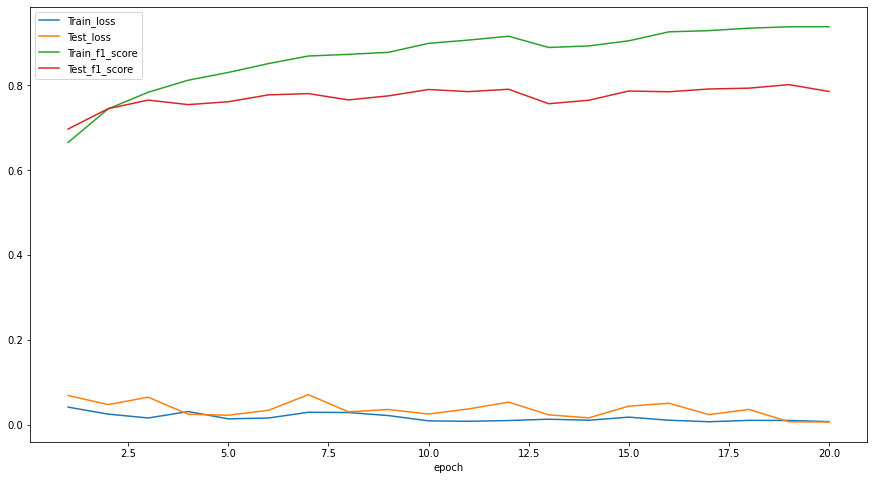

In [ ]:
#plot all the values for the model trained on the crackforest dataset 
df.plot(x='epoch',figsize=(15,8));

In [ ]:
df

epoch  Train_loss  Test_loss  Train_f1_score  Test_f1_score
0       1    0.042323   0.069766        0.665520       0.697096
1       2    0.025924   0.048390        0.744544       0.745003
2       3    0.016836   0.065791        0.783670       0.765145
3       4    0.031930   0.025523        0.812057       0.754532
4       5    0.014805   0.023320        0.830260       0.761276
5       6    0.016719   0.034823        0.851113       0.777445
6       7    0.030293   0.071679        0.868980       0.780451
7       8    0.029639   0.031263        0.872899       0.765640
8       9    0.022470   0.036804        0.877636       0.775122
9      10    0.010012   0.026000        0.898801       0.790115
10     11    0.009046   0.038227        0.906496       0.785155
11     12    0.010775   0.054125        0.915524       0.790711
12     13    0.013908   0.024169        0.889040       0.756630
13     14    0.011530   0.017118        0.892756       0.764759
14     15    0.018784   0.044572        0.904744       0.786567
15     16    0.011504   0.051541        0.925872       0.784790
16     17    0.007969   0.024707        0.928719       0.791326
17     18    0.011204   0.037031        0.934457       0.793258
18     19    0.010962   0.007879        0.937791       0.801601
19     20    0.008269   0.007276        0.938003       0.785518

In [ ]:
print(df[['Train_f1_score','Test_f1_score']].max())

Train_f1_score    0.938003
Test_f1_score     0.801601
dtype: float64


In [ ]:
#not run
from google.colab import files
files.download('/content/Segdata/Dataset_face_seg/CFEXP1/log.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#not run
files.download('/content/Segdata/Dataset_face_seg/CFEXP1/weights.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Sample Prediction

In [ ]:
import cv2
# Read  a sample image and mask from the data-set
originalImage = cv2.imread(f'/content/Segdata/Dataset_face_seg/dataset/subsamples/images/real_image11700.jpg_RESAMPLED_d0e8f2175688040a_scaled.png')

# Resize image
#img = cv2.resize(originalImage, (256, 256), cv2.INTER_AREA).transpose(2,0,1)

# Uncomment above line and use the below one for inference with original image size
img = originalImage.transpose(2,0,1)

img = img.reshape(1, 3, img.shape[1],img.shape[2])

mask = cv2.imread(f'/content/Segdata/Dataset_face_seg/dataset/subsamples/masks/real_image11700.jpg_RESAMPLED_d0e8f2175688040a_scaled.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

In [ ]:
print(a['out'].shape)

torch.Size([1, 3, 256, 256])


(array([57025., 68521., 10002.,  5092., 23491., 30962.,   775.,   431.,
          224.,    85.]),
 array([-0.10516124,  0.00512248,  0.11540621,  0.22568993,  0.33597365,
         0.44625738,  0.5565411 ,  0.6668248 ,  0.77710855,  0.8873923 ,
         0.997676  ], dtype=float32),
 <a list of 10 Patch objects>)

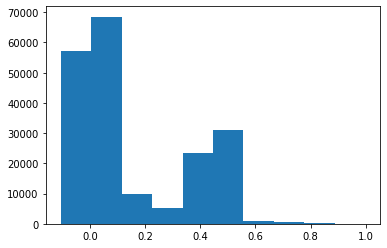

In [ ]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
import matplotlib.pyplot as plt
plt.hist(a['out'].data.cpu().numpy().flatten())

In [ ]:
import numpy as np

def interval_mapping(image, from_min, from_max, to_min, to_max):
    # map values from [from_min, from_max] to [to_min, to_max]
    # image: input array
    from_range = from_max - from_min
    to_range = to_max - to_min
    scaled = np.array((image - from_min) / float(from_range), dtype=float)
    return to_min + (scaled * to_range)

#stop here 

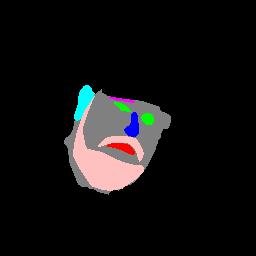

In [ ]:
mask1= Image.open("/content/Segdata/Dataset_face_seg/dataset/subsamples/masks/real_image11700.jpg_RESAMPLED_d0e8f2175688040a_scaled.png")
mask1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


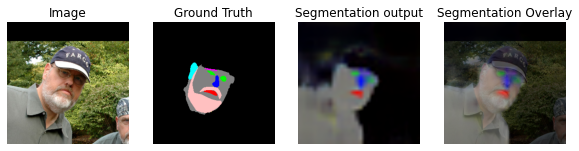

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(141);

image = cv2.cvtColor(img[0].transpose(1,2,0), cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="viridis");
plt.title('Image')
plt.axis('off');
plt.subplot(142);
plt.imshow(mask1);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(143);

from matplotlib import colors, cm

outImage = a['out'].cpu().detach().numpy()[0]
#norm = colors.LogNorm(outImage.mean() + 0.5 * outImage.std(), outImage.max(), clip=True)

#outImage = interval_mapping(outImage, outImage.min(), outImage.max(), 0, 255)
#plt.imshow(outImage.transpose(1,2,0));
plt.imshow(outImage.transpose(1,2,0))
#plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation output')
plt.axis('off');
plt.subplot(144);
#plt.imshow(outImage.transpose(1,2,0));
plt.imshow(image,cmap="viridis")
plt.imshow(outImage.transpose(1,2,0), alpha=0.7)
#plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation Overlay')
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


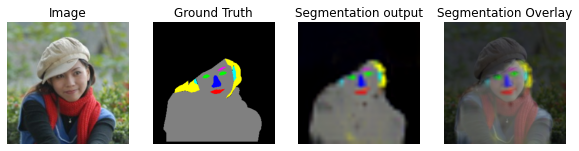

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(141);

image = cv2.cvtColor(img[0].transpose(1,2,0), cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="viridis");
plt.title('Image')
plt.axis('off');
plt.subplot(142);
plt.imshow(mask1);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(143);

from matplotlib import colors, cm

outImage = a['out'].cpu().detach().numpy()[0]
#norm = colors.LogNorm(outImage.mean() + 0.5 * outImage.std(), outImage.max(), clip=True)

#outImage = interval_mapping(outImage, outImage.min(), outImage.max(), 0, 255)
#plt.imshow(outImage.transpose(1,2,0));
plt.imshow(outImage.transpose(1,2,0))
#plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation output')
plt.axis('off');
plt.subplot(144);
#plt.imshow(outImage.transpose(1,2,0));
plt.imshow(image,cmap="viridis")
plt.imshow(outImage.transpose(1,2,0), alpha=0.7)
#plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation Overlay')
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


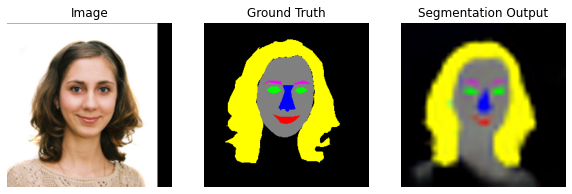

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);

image = cv2.cvtColor(img[0].transpose(1,2,0), cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="viridis");
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask1);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);

from matplotlib import colors, cm

outImage = a['out'].cpu().detach().numpy()[0]
#norm = colors.LogNorm(outImage.mean() + 0.5 * outImage.std(), outImage.max(), clip=True)

#outImage = interval_mapping(outImage, outImage.min(), outImage.max(), 0, 255)
plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation Output')
plt.axis('off');

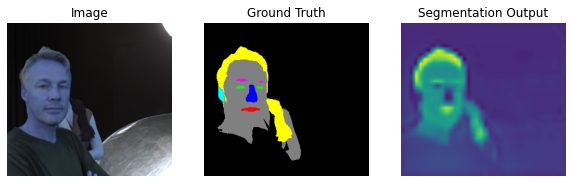

In [ ]:

# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
#plt.imshow(img[0,...].transpose(1,2,0));
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask1);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]);
plt.title('Segmentation Output')
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


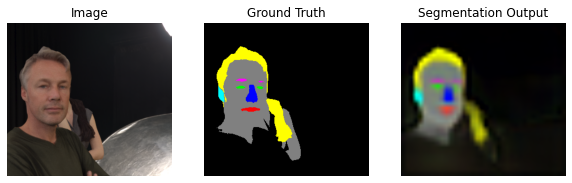

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);

image = cv2.cvtColor(img[0].transpose(1,2,0), cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="viridis");
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask1);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);

from matplotlib import colors, cm

outImage = a['out'].cpu().detach().numpy()[0]
#norm = colors.LogNorm(outImage.mean() + 0.5 * outImage.std(), outImage.max(), clip=True)

#outImage = interval_mapping(outImage, outImage.min(), outImage.max(), 0, 255)
plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation Output')
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


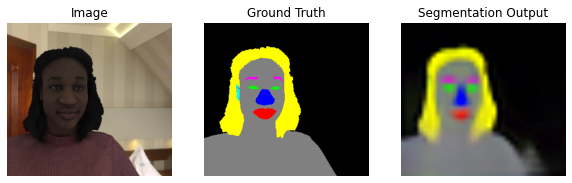

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);

image = cv2.cvtColor(img[0].transpose(1,2,0), cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="viridis");
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask1);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);

from matplotlib import colors, cm

outImage = a['out'].cpu().detach().numpy()[0]
# norm = colors.LogNorm(outImage.mean() + 0.5 * outImage.std(), outImage.max(), clip=True)

# outImage = interval_mapping(outImage, outImage.min(), outImage.max(), 0, 255)
plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation Output')
plt.axis('off');